Tian R, et al. CRISPR Interference-Based Platform for Multimodal Genetic Screens in Human iPSC-Derived Neurons. Neuron. 2019 Oct 23;104(2):239-255.e12.

In [2]:
source('./data_processing.R')

In [9]:
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# iPSC_lane1

GSM3543620	CROP-seq_iPSC_sgRNA_enrichment_for_lane1

In [10]:
input_dir = './GiRAFR_outputs/Tian_Neuron/sample1/'
output_dir = './figures_results/Tian_Neuron/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 12623"
[1] "Wildtype UMI: 216577"
[1] "Mutant UMI: 24546"


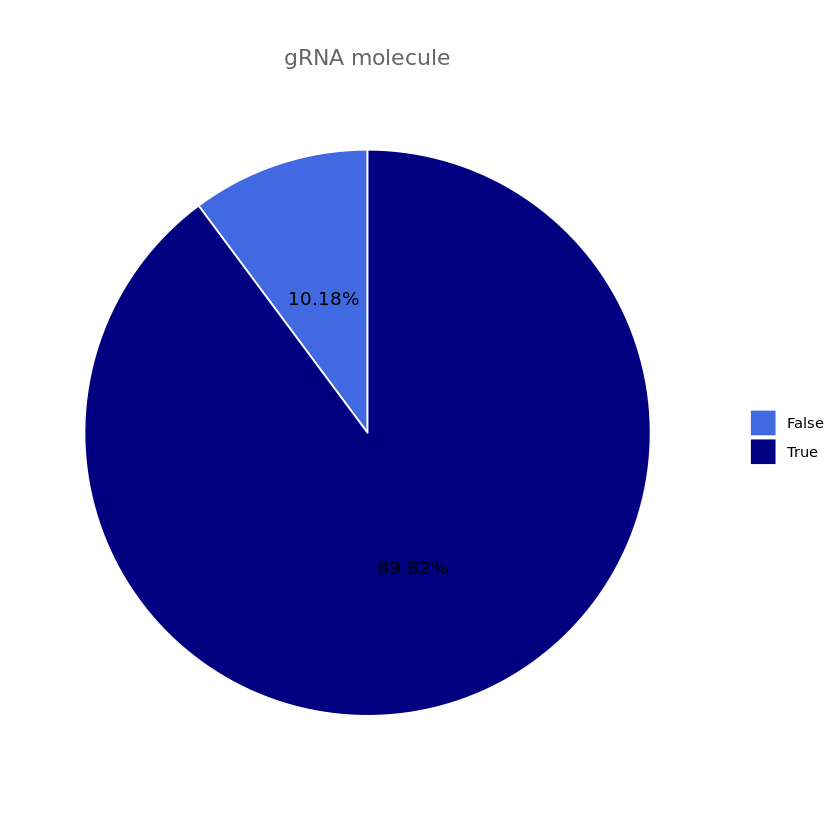

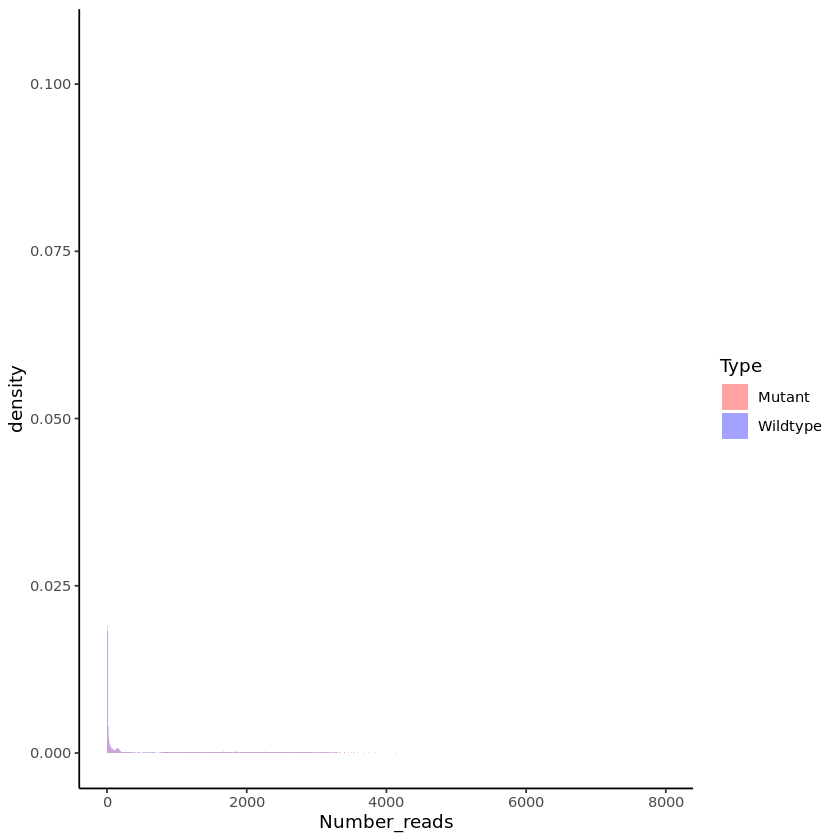

In [5]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(4)    G I(1) I(2) I(4) I(8)    T 
 270  175   54    3    1  140   26    1    2    1  224 
[1] "MT mutation type"

  D   I   S 
 58  30 809 
[1] "MT mutation structure"

gRNA Rest   U6 
 601  214   82 


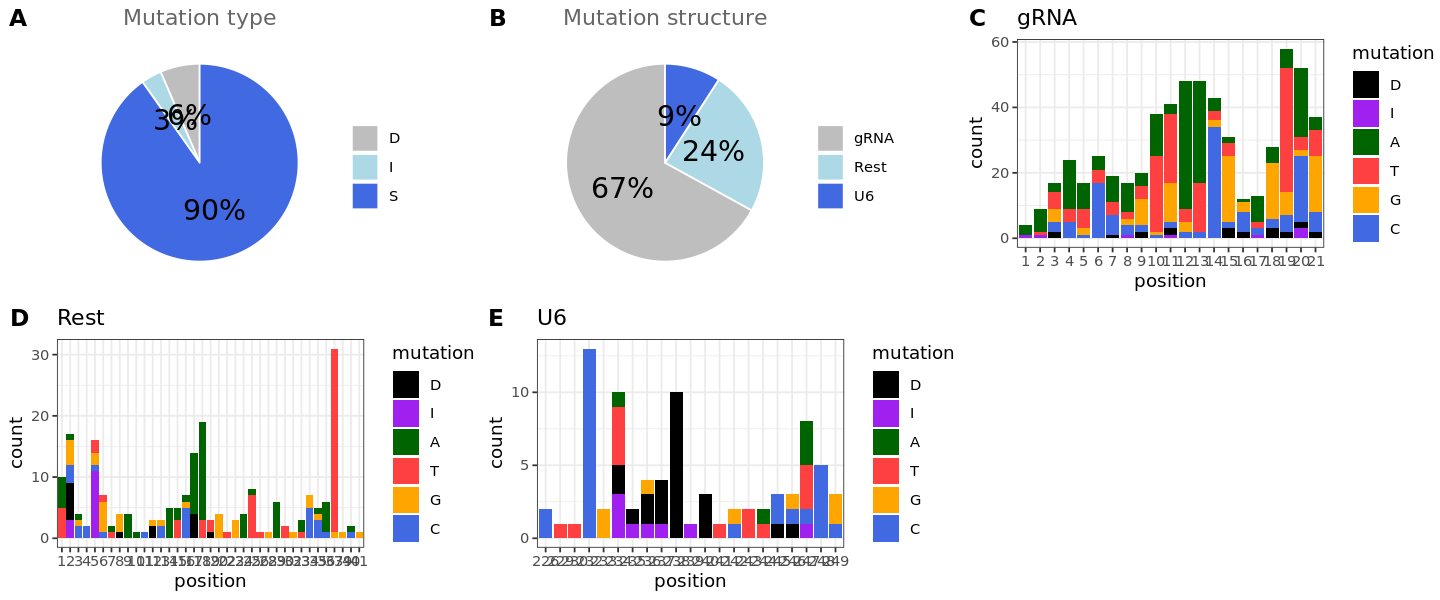

In [6]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [7]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.857   1.000  11.000 

Warning message:
“Removed 44 rows containing non-finite values (stat_count).”


[1] 58

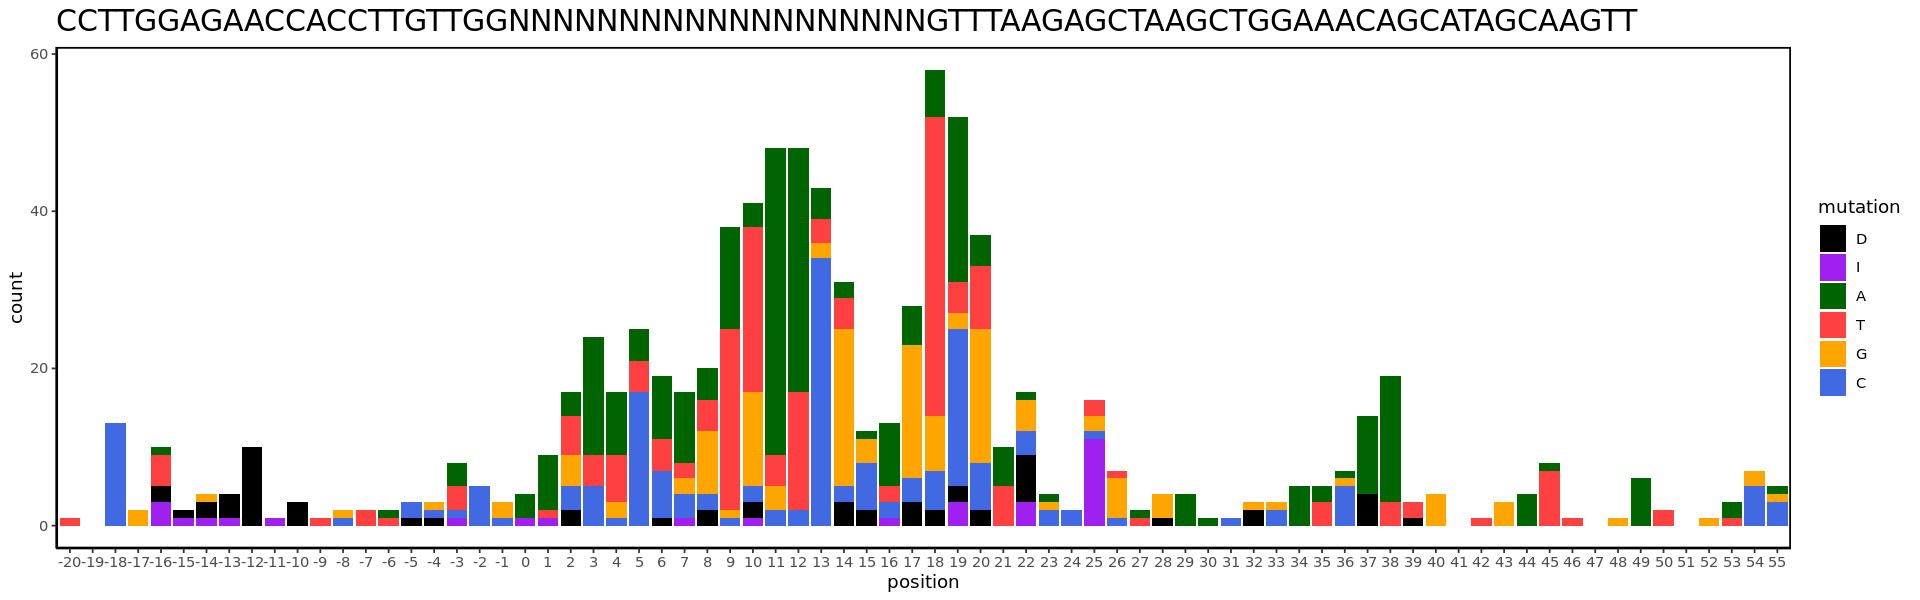

In [8]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
max(table(MT2$position))
#dev.off()

### Cell assignment

Rows: 13970 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


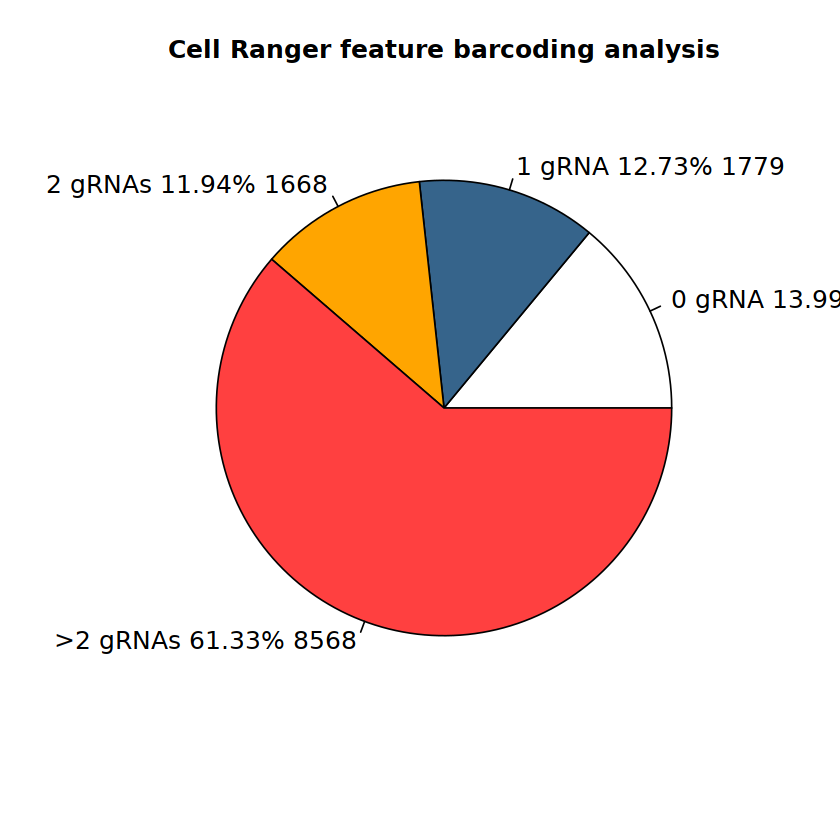

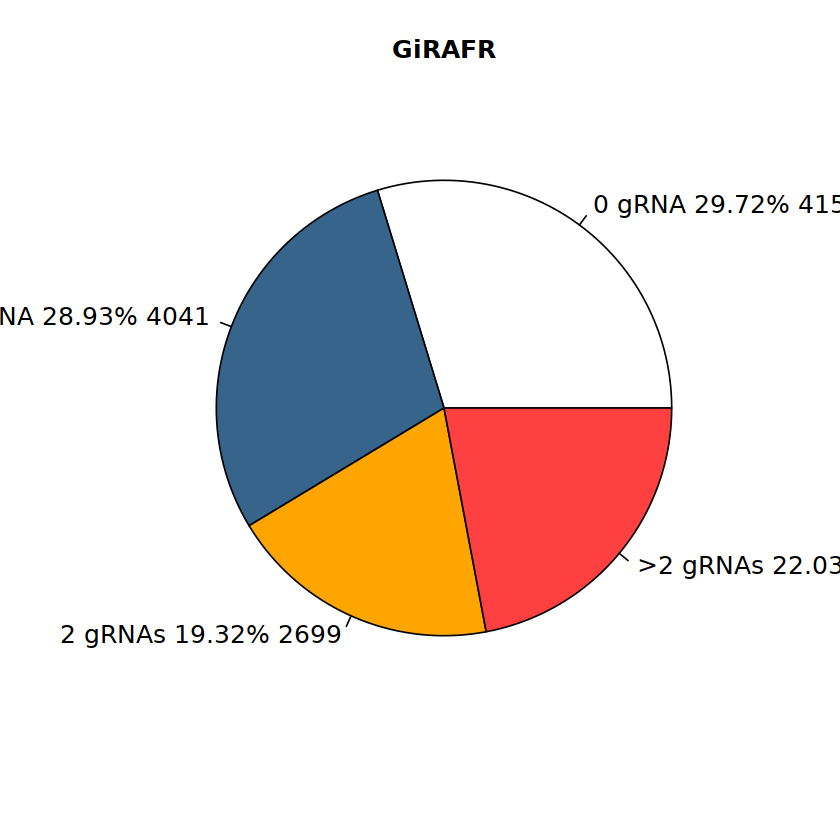

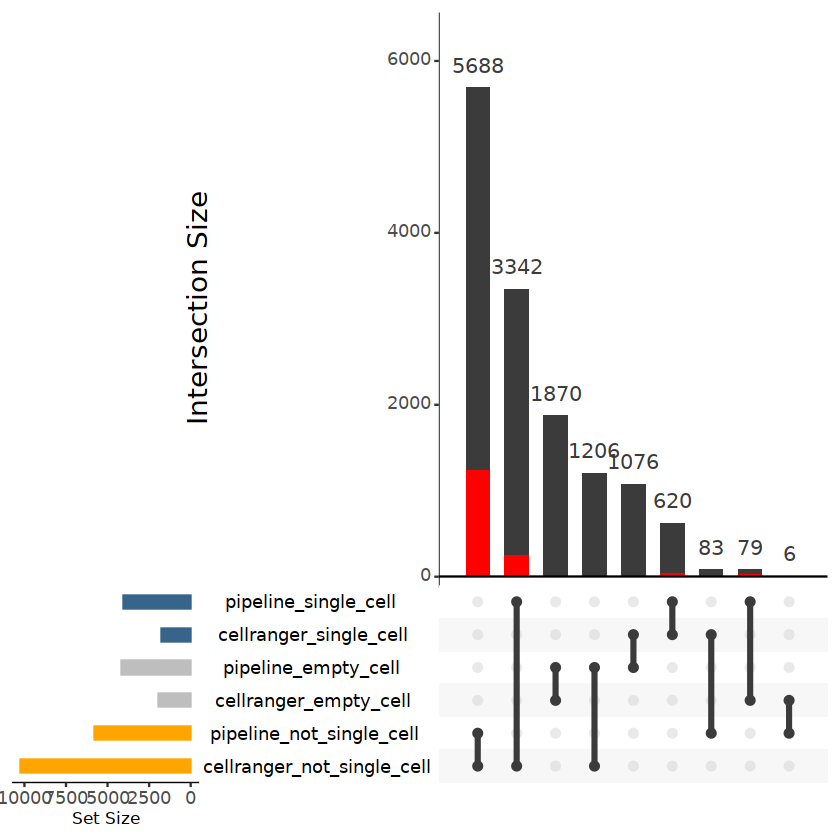

In [11]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1//outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"

all_barcodes <- compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir, out = TRUE)


In [10]:
girafr.umi.threshold <- read.table('./GiRAFR_outputs/Tian_Neuron/sample1/gRNA.umi.threshold.txt')
girafr.umi.threshold$V1 <- sub('_gene','',girafr.umi.threshold$V1)
cellranger.umi.threshold <- read.table('/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1/outs/crispr_analysis/protospacer_umi_thresholds.csv', sep = ',', header = T)


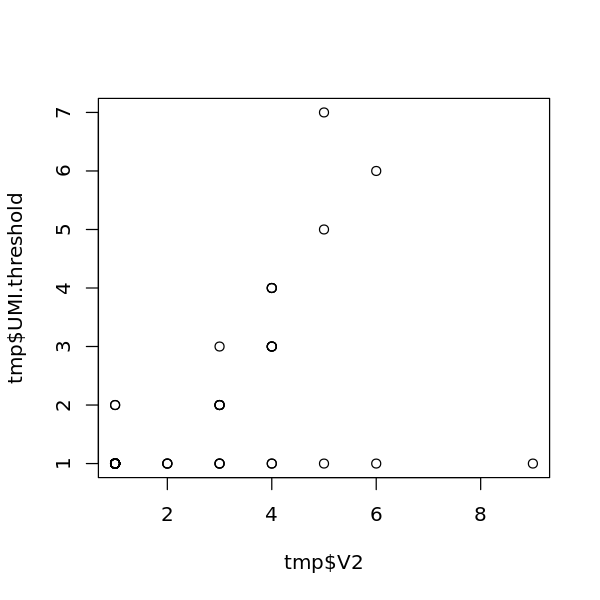

In [15]:
options(repr.plot.width = 5, repr.plot.height = 5)
tmp <- merge(girafr.umi.threshold, cellranger.umi.threshold, by.x = 'V1', by.y = 'Protospacer')
plot(tmp$V2, tmp$UMI.threshold)
options(repr.plot.width = 8, repr.plot.height = 8)

In [5]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')

cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
table(cells.num_features$num_features)

sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
n_col 
sum(!is.na(cells.gRNA[,13]))+ sum(!is.na(cells.gRNA[,11]))+ sum(!is.na(cells.gRNA[,9])) + sum(!is.na(cells.gRNA[,7]))
# cells with mutations (multiplets count as multiple)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
4041 2699 1565  770  379  194   84   41   17   16    5    2    3    1    1 

[1] 21649

[1] 14

[1] 1722

In [12]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
   59    26 

# iPSC_lane2

GSM3543621	CROP-seq_iPSC_sgRNA_enrichment_for_lane2

In [13]:
input_dir = './GiRAFR_outputs/Tian_Neuron/sample2/'
output_dir = './figures_results/Tian_Neuron/sample2'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 11359"
[1] "Wildtype UMI: 214267"
[1] "Mutant UMI: 23468"


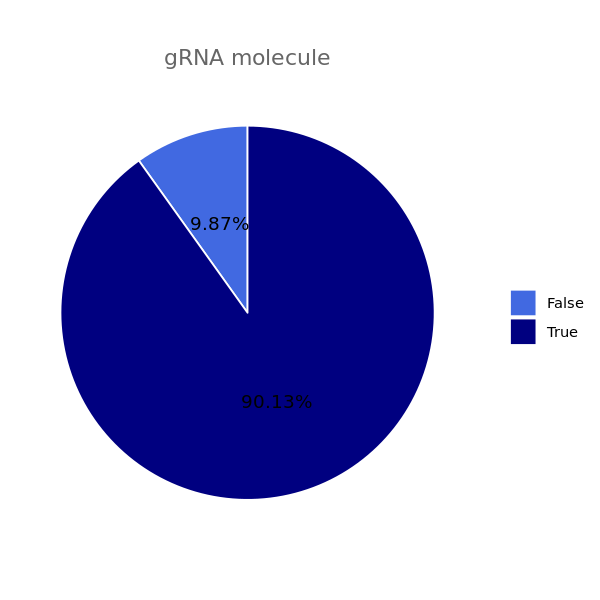

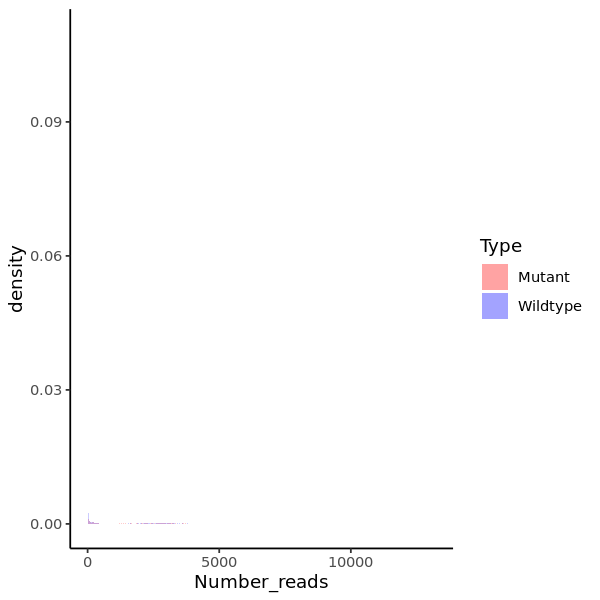

In [13]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)

### MT.txt

[1] "MT mutation table"

   A    C D(1) D(2) D(3)    G I(1) I(3) I(5)    T 
 295  190   47    6    4  141   27    2    1  254 
[1] "MT mutation type"

  D   I   S 
 57  30 880 
[1] "MT mutation structure"

gRNA Rest   U6 
 688  182   97 


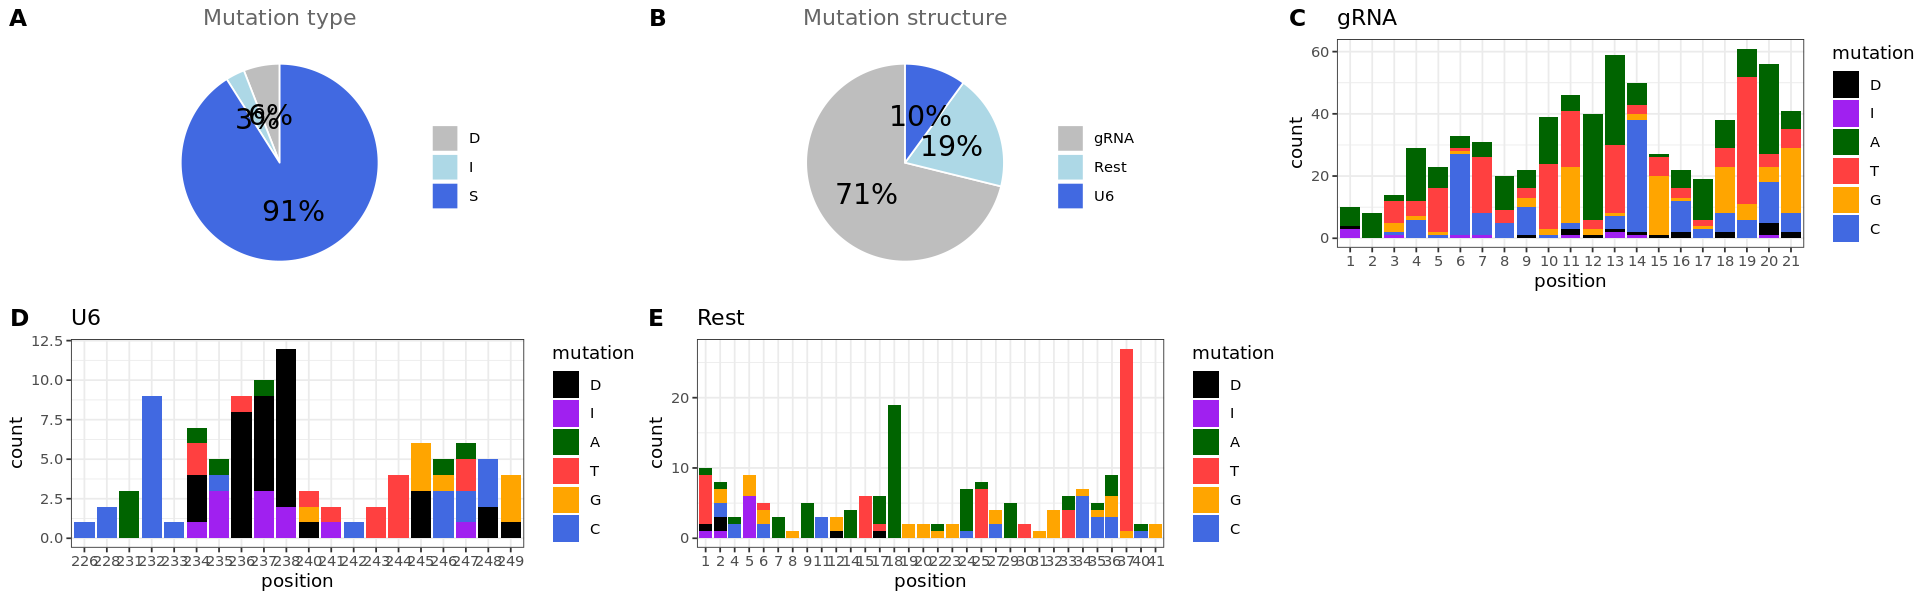

In [17]:
options(repr.plot.width = 16, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [18]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.978   1.000  11.000 

Warning message:
“Removed 43 rows containing non-finite values (stat_count).”


[1] 61

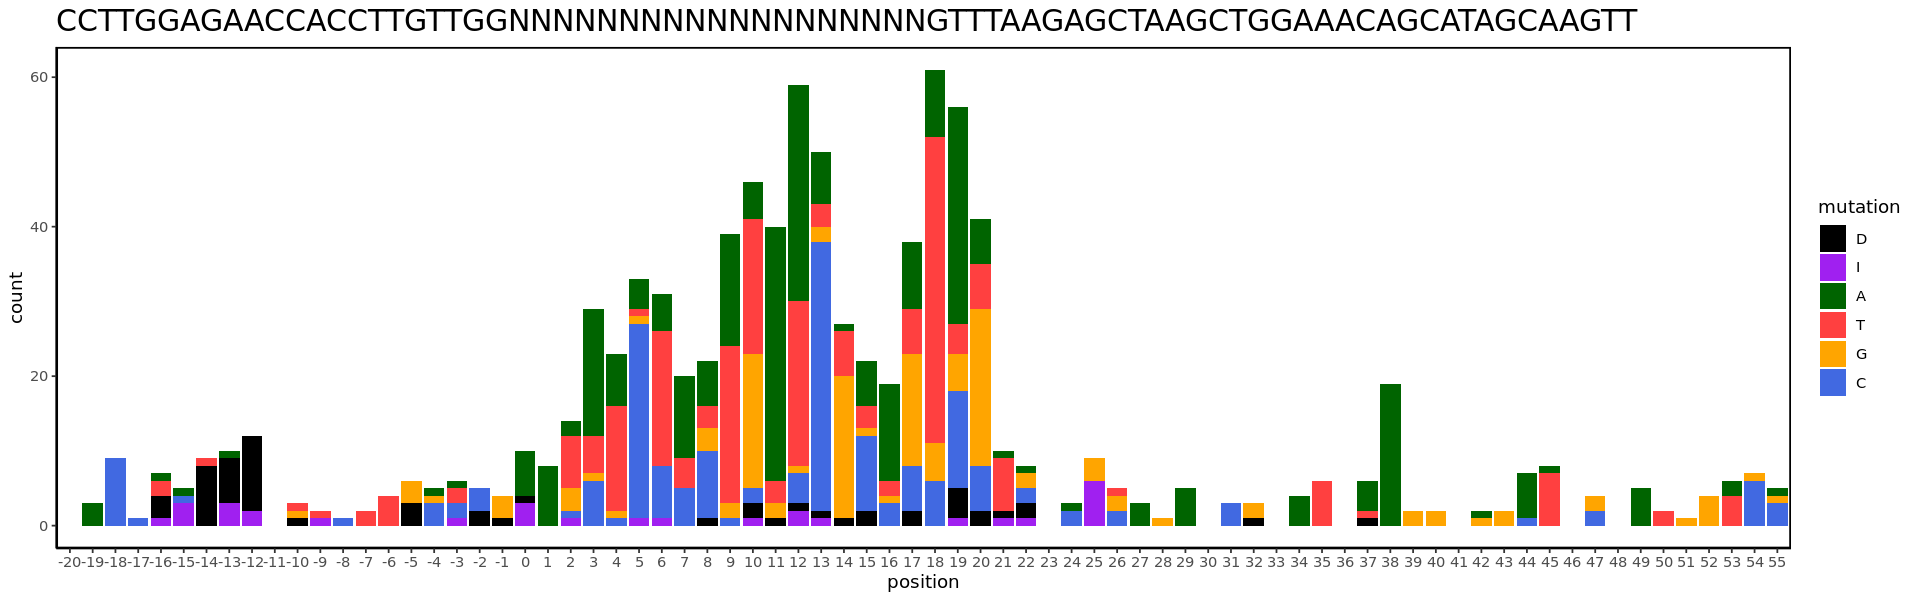

In [19]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')
max(table(MT2$position))
#dev.off()

### Cell assignment

Rows: 12331 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


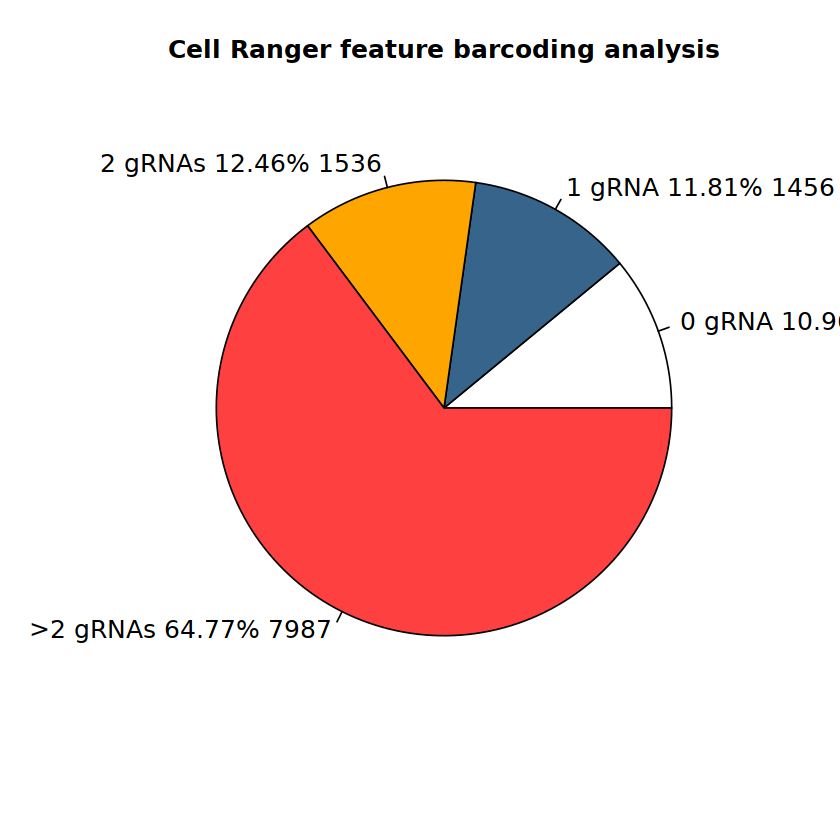

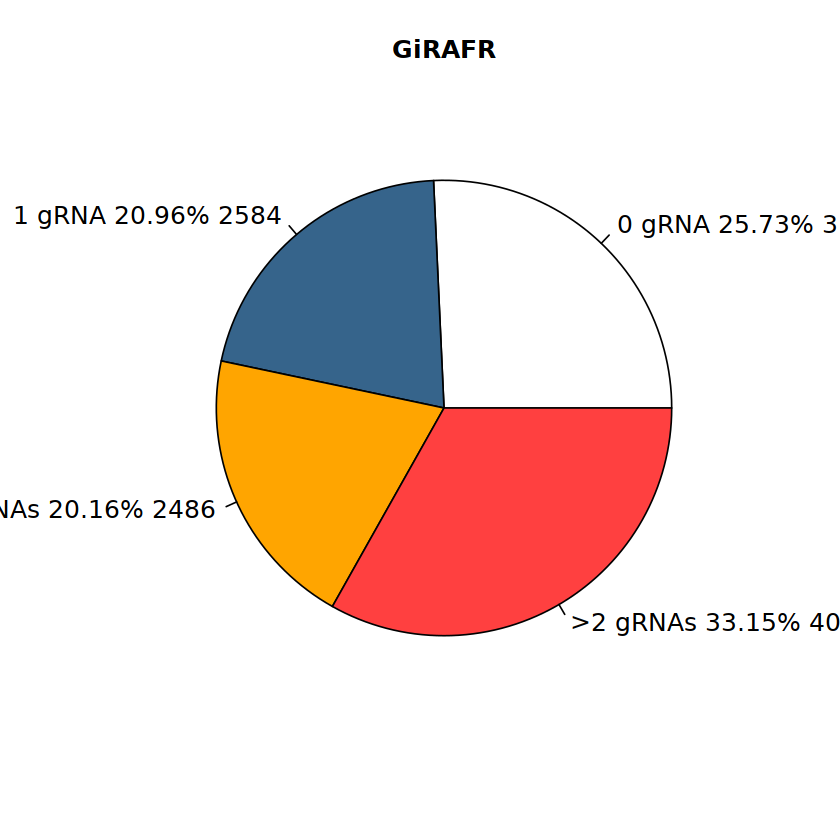

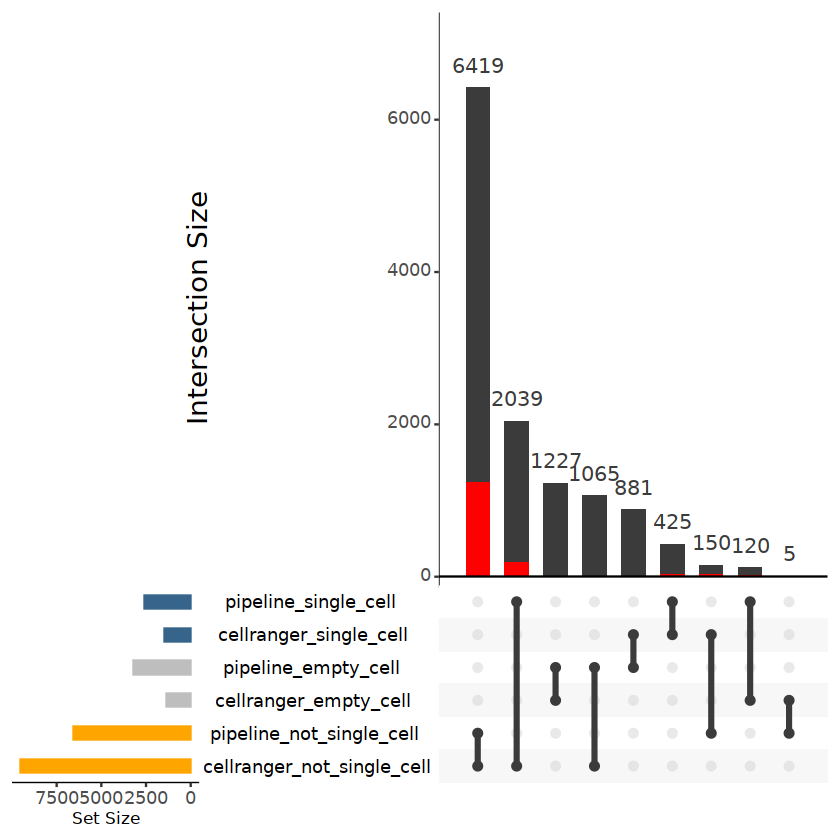

In [14]:
protospacer_calls_per_cell <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane2//outs/crispr_analysis/protospacer_calls_per_cell.csv'
cellranger_barcode <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane2/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
all_barcodes <- compare_cell_numer(protospacer_calls_per_cell, cellranger_barcode, input_dir, output_dir, out = TRUE)

In [15]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                         header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
                                     
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')

cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))
table(cells.num_features$num_features)

sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
n_col 
sum(!is.na(cells.gRNA[,13]))+ sum(!is.na(cells.gRNA[,11]))+ sum(!is.na(cells.gRNA[,9])) + sum(!is.na(cells.gRNA[,7]))
# cells with mutations (multiplets count as multiple)


   1    2    3    4    5    6    7    8    9   10   11   12   13   16 
2584 2486 1906 1124  560  254  148   48   24   12    6    3    2    1 

[1] 23994

[1] 14

[1] 1656

In [16]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  107    18 

# combine samples MT position

Warning message:
“Removed 87 rows containing non-finite values (stat_count).”
Warning message:
“Removed 87 rows containing non-finite values (stat_count).”


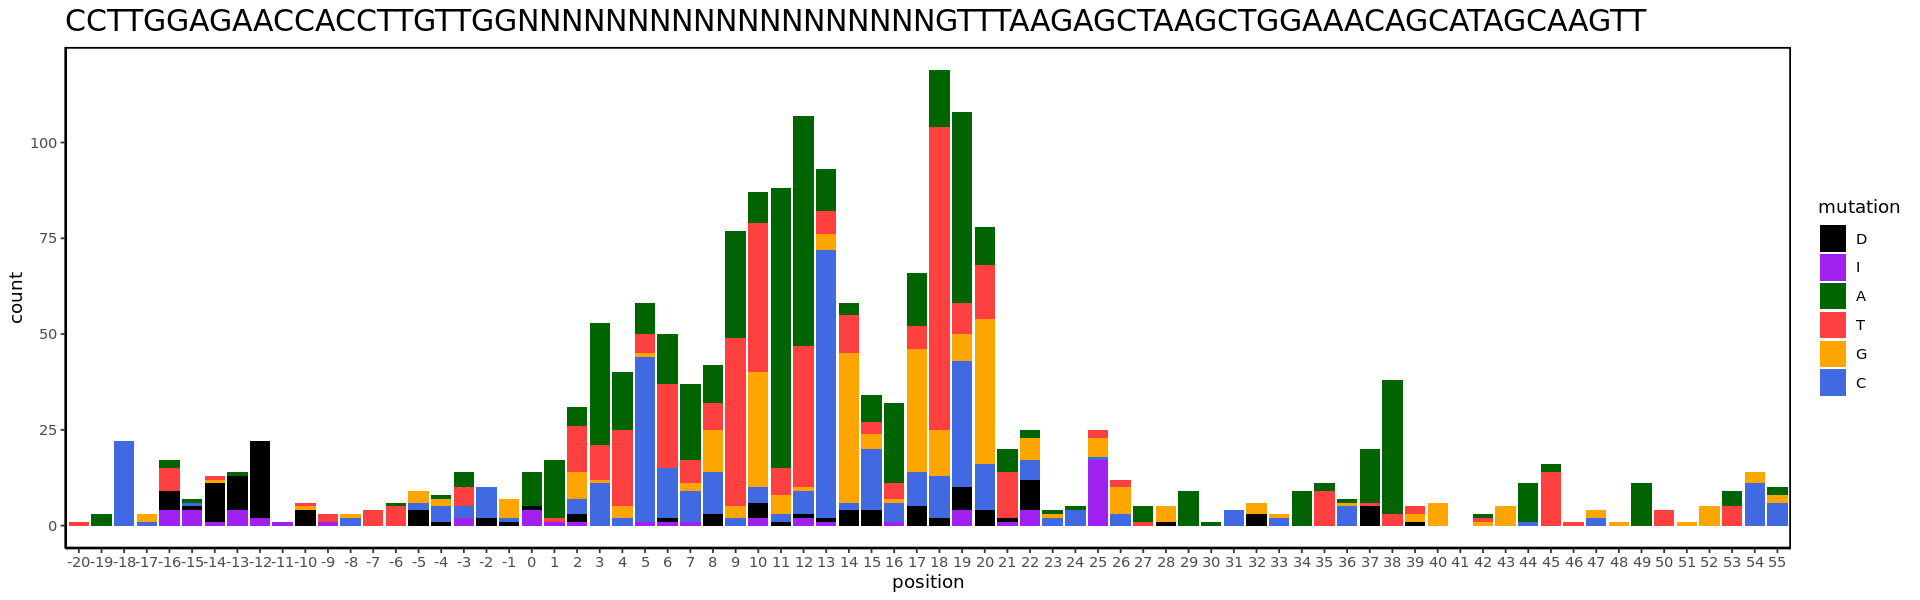

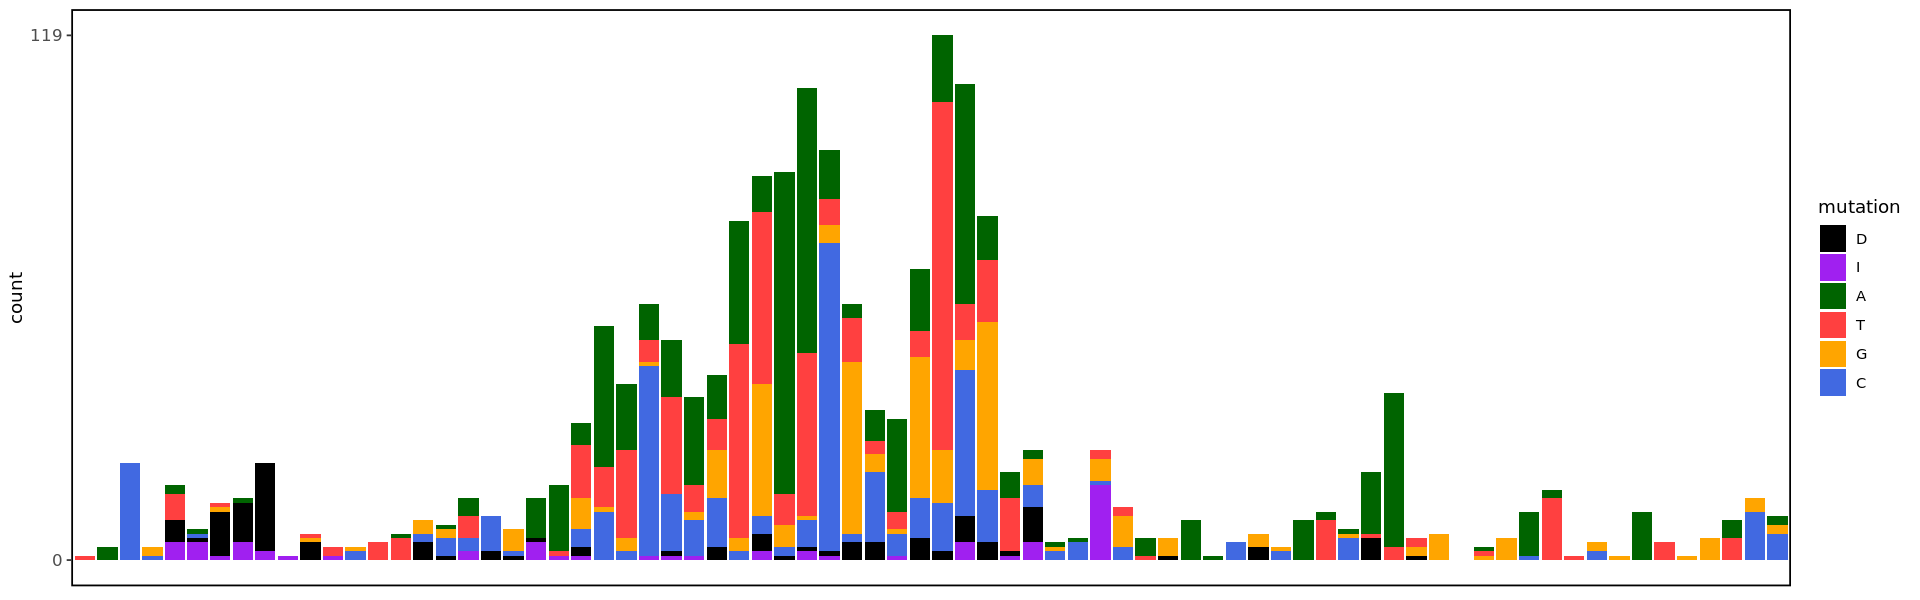

In [21]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Tian_Neuron/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Tian_Neuron/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

#save_pdf <- paste0('./figures_results/Tian_Neuron/', 'Combined.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)

MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))
MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'CCTTGGAGAACCACCTTGTTGGNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTT')


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.y = element_text(size=10),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,max(table(MT2$position))))

#dev.off()

# MT gRNA impact

[1] "MT mutation table"

   A    C D(1) D(2) D(4)    G I(1) I(2) I(4) I(8)    T 
 270  175   54    3    1  140   26    1    2    1  224 
[1] "MT mutation type"

  D   I   S 
 58  30 809 
[1] "MT mutation structure"

gRNA Rest   U6 
 601  214   82 


ERROR: Error in pdf(save_pdf, height = 10, width = 20): cannot open file './tmp/test.all.MT.pdf'


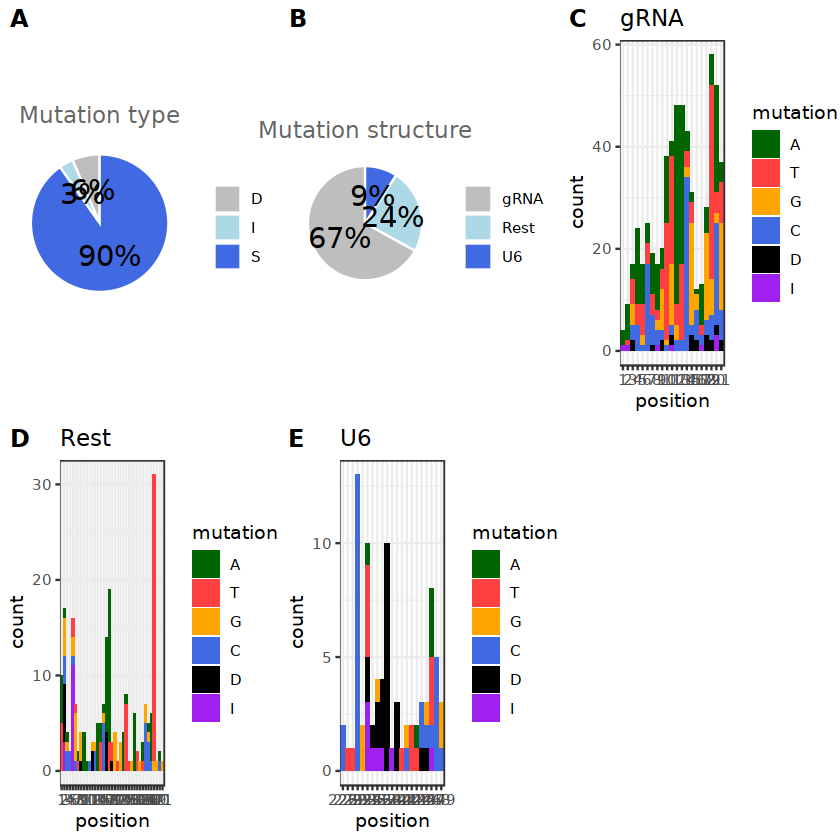

In [3]:
output_dir = './tmp/test'
input_dir = './GiRAFR_outputs/Tian_Neuron/sample1/'
fba_input_dir = '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane1/'

MT <- plot_MT_pattern(input_dir, output_dir)


In [4]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA
    
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))    
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
4041 2699 1565  770  379  194   84   41   17   16    5    2    3    1    1 

[1] 9818

Rows: 13970 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


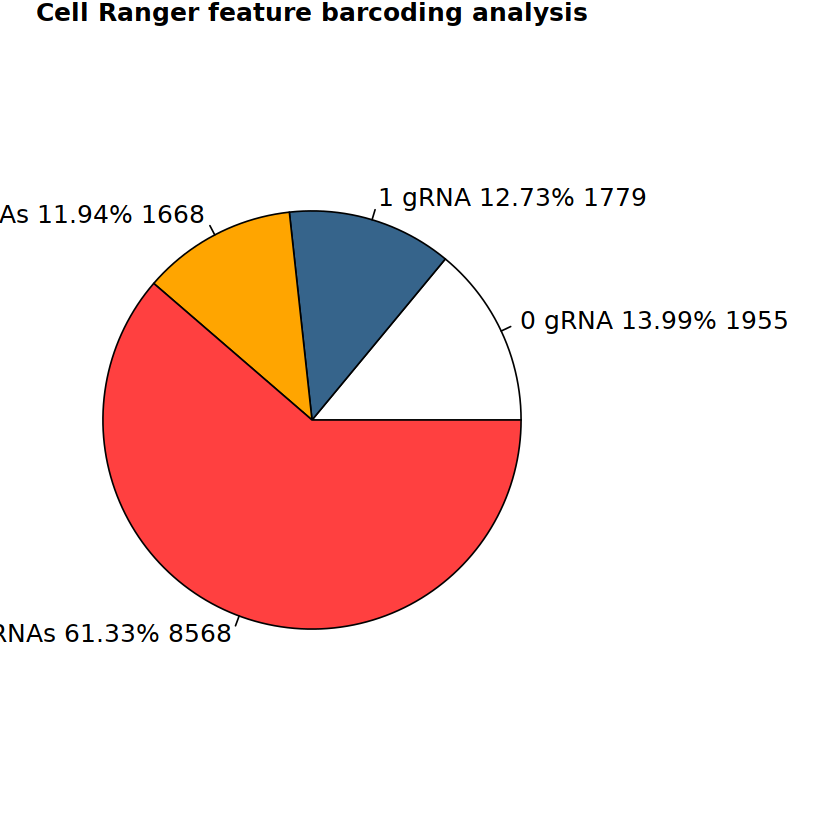

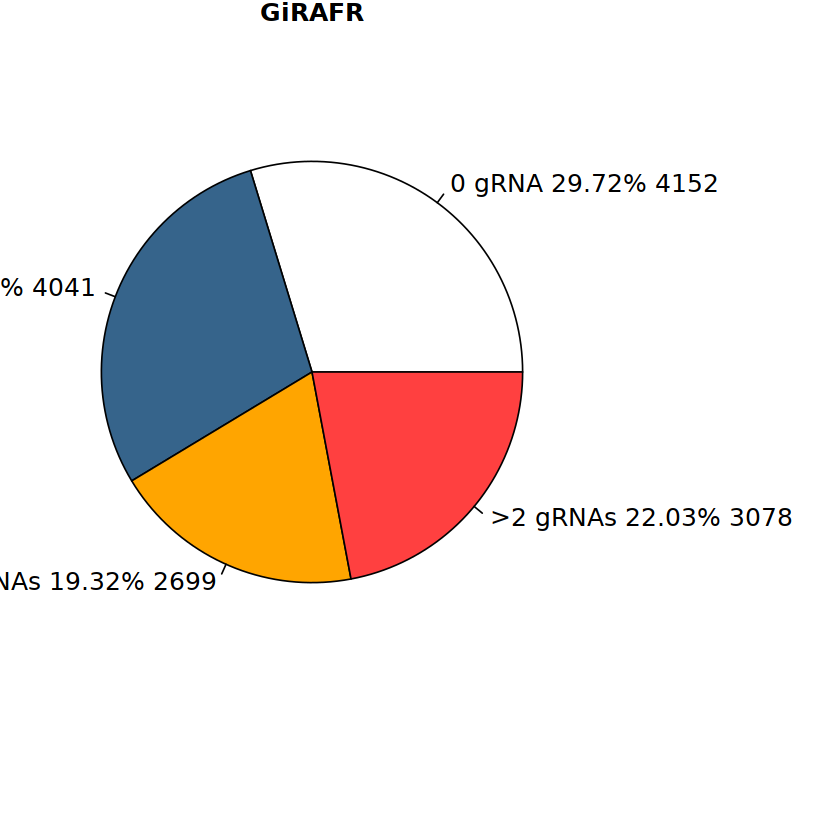

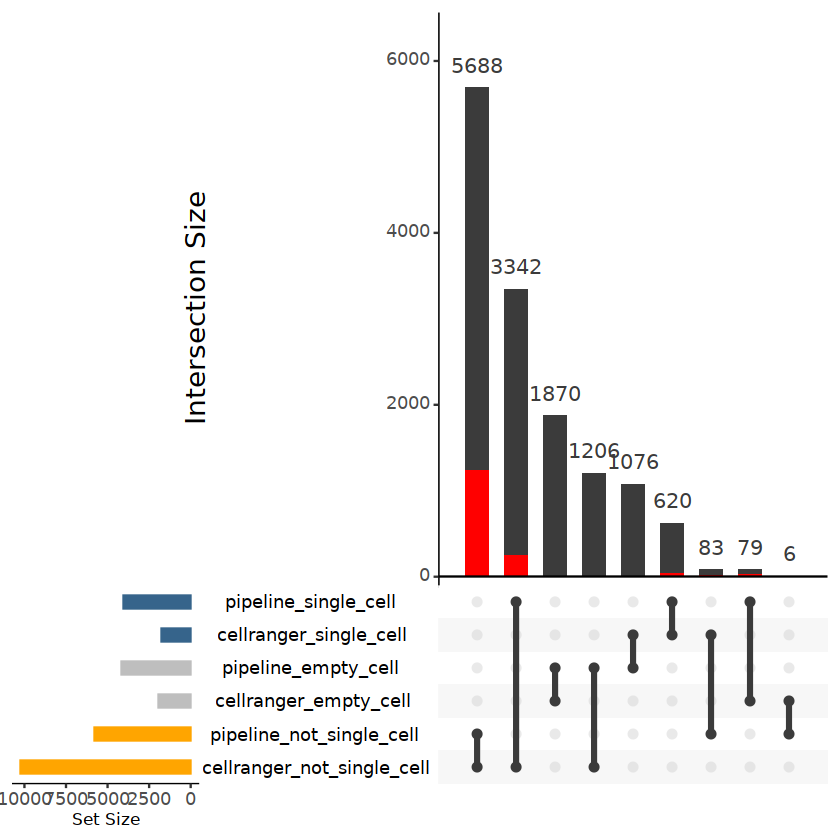

In [5]:
protospacer_file <- paste0(fba_input_dir, '/outs/crispr_analysis/protospacer_calls_per_cell.csv')
barcodes_file <- paste0(fba_input_dir, '/outs/filtered_feature_bc_matrix/barcodes.tsv.gz')

protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)


pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)


Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))

p

In [6]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
   59    26 

In [7]:
table(all_barcodes$has_MT)


FALSE  TRUE 
 8246  1572 

### Analysis impact of mutant gRNA and doublets

In [8]:
input_dir

[1] "./GiRAFR_outputs/Tian_Neuron/sample1/"

In [9]:
cells.gRNA.single.MT <- read.table(paste0(input_dir, 'cells.gRNA.single.MT.txt'), stringsAsFactors = FALSE)
cells.gRNA.single.MT$target <- sapply(strsplit(cells.gRNA.single.MT$V3,"_"), `[`, 1)
cells.gRNA.single.MT[grepl('non-targeting',cells.gRNA.single.MT$target),]$target <- 'Control'
cells.gRNA.single.MT$is_WT <- !grepl(pattern = 'variant',cells.gRNA.single.MT$V3)
#table(cells.gRNA.single.MT$is_WT)
cells.gRNA.single.MT$cb = paste0(cells.gRNA.single.MT$V1, '-1')

In [10]:
diff_cb <- pipeline_Single[!pipeline_Single %in% cells.gRNA.single.MT$cb]

In [11]:
length(diff_cb)

[1] 0

pipeline_Single

In [12]:
all.matrix <- Read10X(paste0(fba_input_dir,'/outs/filtered_feature_bc_matrix/'))
expression.seurat.ori = CreateSeuratObject(counts = all.matrix$`Gene Expression`)
expression.seurat <- subset(expression.seurat.ori, cells = pipeline_Single)

expression.seurat <- NormalizeData(object = expression.seurat, normalization.method = "LogNormalize", scale.factor = 10000)
rownames(cells.gRNA.single.MT) <- cells.gRNA.single.MT$cb
expression.seurat@meta.data$KO <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'target']
expression.seurat@meta.data$is_WT <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'is_WT']
expression.seurat@meta.data$mutation <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'V5']
expression.seurat@meta.data$cb <- rownames(expression.seurat@meta.data)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [13]:
sum(is.na(expression.seurat@meta.data$KO)) 
# should be same as length(diff_cb) 

[1] 0

In [14]:
rownames(cells.has_MT) <- cells.has_MT$cb
expression.seurat@meta.data$has_MT <- cells.has_MT[rownames(expression.seurat@meta.data), ]$has_MT

Warning message:
“Setting row names on a tibble is deprecated.”


In [15]:
diff_cb_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% diff_cb),]
rownames(diff_cb_gRNA) <- diff_cb_gRNA$cb

In [16]:
# replace KO NA into target
expression.seurat@meta.data$KO[which(expression.seurat@meta.data$cb %in% diff_cb)] <- 
sapply(strsplit(diff_cb_gRNA[rownames(expression.seurat@meta.data[which(expression.seurat@meta.data$cb %in% diff_cb),]), 'target'], '_'), `[`, 1)

In [17]:
table(expression.seurat@meta.data$is_WT, expression.seurat@meta.data$has_MT)
# has some discrepancy 

       
        FALSE TRUE
  FALSE     0  310
  TRUE   3731    0

In [18]:
#expression.seurat@meta.data[which(expression.seurat@meta.data$is_WT == FALSE & expression.seurat@meta.data$has_MT == FALSE),]

In [19]:
unique(expression.seurat$KO)

[1] "UQCRQ"   "GUK1"    "PPP2R1A" "MAT2A"   "FECH"    "PPCDC"   "RAB7A"  
 [8] "MVK"     "RFK"     "MMAB"    "Control" "UBA1"    "PMVK"    "HACD2"  
[15] "DUSP8"   "KIF1A"   "HMGCS1"  "SQLE"    "SACM1L"  "PPP1R8"  "ATP5A1" 
[22] "UROD"    "ATP5B"   "SEPSECS" "LSS"     "MAPK8"   "MAP3K12" "NDUFA1" 
[29] "PGGT1B"  "GSR"     "TARS2"   "ASNA1"   "TUFM"    "PPP1CB"

In [20]:
expression.seurat$KO[expression.seurat$KO == 'ATP5A1'] <- 'ATP5F1A'
expression.seurat$KO[expression.seurat$KO == 'ATP5B'] <- 'ATP5F1B'

In [21]:
targets <- unique(expression.seurat@meta.data$KO)
targets <- targets[targets!='Control']
all.exp2.df <- data.frame()
CTRL_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == 'Control'),])
for(gene in targets){
        KO_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == gene),])
        tmp.df <- rbind(data.frame(expression = expression.seurat@assays$RNA@data[gene, KO_cells], type = 'KO'),
            data.frame(expression = expression.seurat@assays$RNA@data[gene, CTRL_cells], type = 'Control'))

        tmp.df$target = gene
        tmp.df$cb = rownames(tmp.df)
        all.exp2.df <- rbind(all.exp2.df, tmp.df)
}

Target gene expression in Control

In [22]:
avg.exp.control <- all.exp2.df[which(all.exp2.df$type == 'Control'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.control <- as.data.frame(avg.exp.control)
rownames(avg.exp.control) <- avg.exp.control$target

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


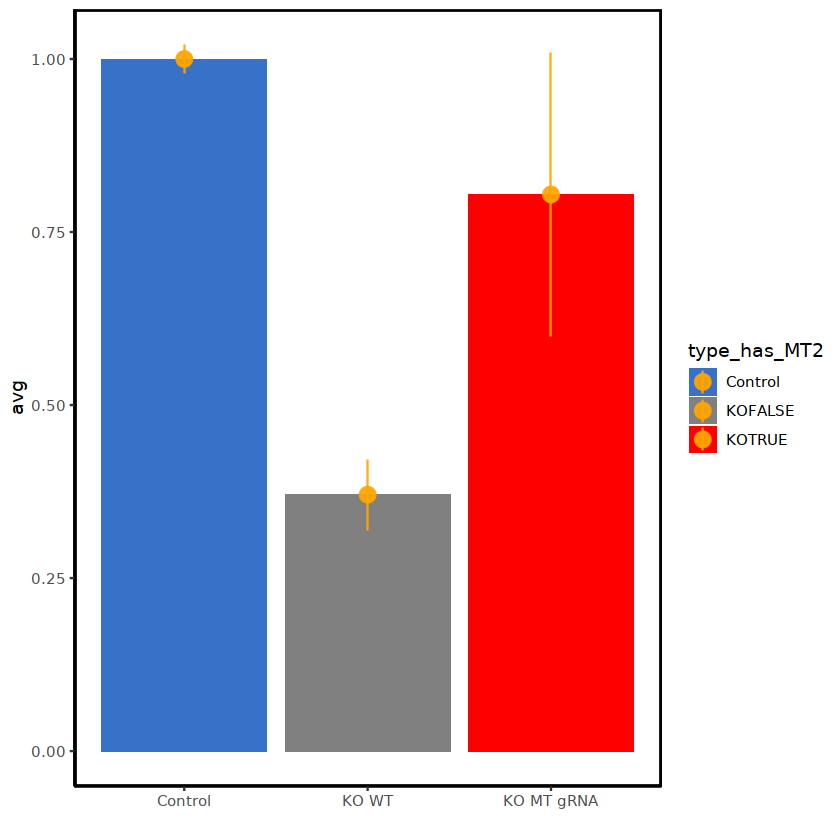

In [23]:
#all.exp2.MT.df <- merge(all.exp2.df, cells.gRNA.single.MT[,c(4,5,8,9)], by = 'cb')
all.exp2.MT.df <- merge(all.exp2.df, expression.seurat@meta.data[,c(4,6,7,8)], by = 'cb')
all.exp2.MT.df$type_has_MT <- paste0(all.exp2.MT.df$type, all.exp2.MT.df$has_MT)

all.exp2.MT.df$type_has_MT2 <- all.exp2.MT.df$type_has_MT
all.exp2.MT.df[which(all.exp2.MT.df$type_has_MT == 'ControlFALSE' |
    all.exp2.MT.df$type_has_MT == 'ControlNA' |
    all.exp2.MT.df$type_has_MT == 'ControlTRUE'),'type_has_MT2'] <- 'Control'


all.exp2.MT.df$expression_norm <- all.exp2.MT.df$expression/avg.exp.control[all.exp2.MT.df$target,'avg']

# high_exp_targets <- avg.exp.control$target[order(avg.exp.control$avg, decreasing = T)]
# tmp.df <- all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), c('tmp','expression_norm')]

tmp.df <- all.exp2.MT.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm),
                                                 sem = sd(expression_norm)/sqrt(n))

p1 <- ggplot(tmp.df, aes(x = type_has_MT2, y = avg, fill = type_has_MT2)) + geom_col()+
        geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
        theme_classic()+
        xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+
        scale_fill_manual(breaks = c("Control", "KOFALSE","KOTRUE"),
                          values=c("#3771c8", "#808080",'#ff0000'))+
        scale_x_discrete(limits = c("Control", "KOFALSE", "KOTRUE"), labels=c("Control" = "Control", "KOFALSE" = "KO WT", "KOTRUE" = "KO MT gRNA"))

print(p1)

### Analysis impact of doublets/multiplets

In [24]:
new_doublets <- all_barcodes[which(all_barcodes$pipeline_not_single_cell == 1 & all_barcodes$cellranger_single_cell == 1), 'X1']
length(new_doublets) 
# pipeline identified doubets, cellranger as single

[1] 83

For new doublets, following scenarios:
1. doublets with the mutant gRNA and wildtype gRNA targeting the same gene, 
2. doublets with the mutant gRNA and wildtype gRNA targeting the different gene
3. doublets with two wildtype gRNA targeting the same gene
4. doublets with two wildtype gRNA targeting different gene
5. doublets with two mutant gRNAs targeting different gene

In [25]:
new_doublets_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% new_doublets),] # the mutant gRNA and wildtype gRNA targeting the same gene,


In [26]:
#new_doublets_type1 <- new_doublets_gRNA[which(new_doublets_gRNA$feature_order >= 2),]
#new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA[which(new_doublets_gRNA$feature_order < 2),] %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [27]:
new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [28]:
new_doublets_gRNA2$KO <- lapply(new_doublets_gRNA2$target, function(x) sapply(strsplit(x, '_'), `[`, 1))
                                

In [29]:
if1 <- lapply(new_doublets_gRNA2$KO, function(x) x[1]== x[2])
if2 <- lapply(new_doublets_gRNA2$UMIs, function(x) x[1]>0 & x[2] > 0)
              
new_doublets_type_unknown <- c()
new_doublets_type2 <- c()
new_doublets_type3 <- c()
new_doublets_type4 <- c()
new_doublets_type5 <- c()
for(i in 1:nrow(new_doublets_gRNA2)){
    if(is.na(if1[i]) | is.na(if2[i])){
        new_doublets_type_unknown <- rbind(new_doublets_type_unknown, new_doublets_gRNA2[i,])
    }else{
    if(if1[i] == TRUE & if2[i] == TRUE){ # two wiltype gRNA targeting the same target
        new_doublets_type3 <- rbind(new_doublets_type3, new_doublets_gRNA2[i,])
    }else if(if1[i] == TRUE & if2[i] == FALSE){ #  mutant gRNA and wildtype gRNA or two muatnt targeting the same gene
        new_doublets_type2 <- rbind(new_doublets_type2, new_doublets_gRNA2[i,])
    }else if(if1[i] == FALSE & if2[i] == TRUE){# two wildtype gRNA targeting different gene
        new_doublets_type4 <- rbind(new_doublets_type4, new_doublets_gRNA2[i,]) 
    }else if(if1[i] == FALSE & if2[i] == FALSE){ # mutant gRNA and wildtype gRNA or two muatnt  different gene 
        new_doublets_type5 <- rbind(new_doublets_type5, new_doublets_gRNA2[i,])
    }else{
        print('unknown error')
    }
    }
}

In [30]:
#nrow(new_doublets_type1)
nrow(new_doublets_type2)
nrow(new_doublets_type3)
nrow(new_doublets_type4)
nrow(new_doublets_type5)
nrow(new_doublets_type_unknown)

NULL

NULL

[1] 66

[1] 14

[1] 3

In [31]:
new_doublets_subset <- rbind(new_doublets_type4, new_doublets_type5)$cb
length(new_doublets_subset)

[1] 80

In [32]:
seurat.object.doublets <- subset(expression.seurat.ori, cells = new_doublets_subset)
seurat.object.doublets <- NormalizeData(object = seurat.object.doublets, normalization.method = "LogNormalize", scale.factor = 10000)
seurat.object.doublets

An object of class Seurat 
33538 features across 80 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data

In [33]:
head(rbind(new_doublets_type4, new_doublets_type5))
table(cells.num_features[which(cells.num_features$cb %in% new_doublets_subset),'num_features'])

,cb,target,UMIs,KO
,<chr>,<list>,<list>,<list>
2,AAGGCAGTCCAAGTAC-1,"MAT2A_sgRNA2_gene, MVK_sgRNA2_gene , PMVK_sgRNA2_gene","16, 1, 1","MAT2A, MVK , PMVK"
3,AATCCAGCAACTGCTA-1,"PPP2R1A_sgRNA2_gene, SEPSECS_sgRNA1_gene","7, 1","PPP2R1A, SEPSECS"
4,ACAGCCGGTTGCCTCT-1,"PPP2R1A_sgRNA2_gene, PMVK_sgRNA2_gene","10, 1","PPP2R1A, PMVK"
5,ACTATCTTCACTTATC-1,"PPP1R8_sgRNA2_gene, KIF1A_sgRNA2_gene","1, 1","PPP1R8, KIF1A"
6,ACTGAACAGTAGCGGT-1,"MMAB_sgRNA1_gene , PPP2R1A_sgRNA2_gene","13, 6","MMAB , PPP2R1A"
7,ACTGATGGTGGCTCCA-1,"non-targeting_sgRNA4_gene, PPP2R1A_sgRNA2_gene","15, 5","non-targeting, PPP2R1A"


num_features
 2  3 
74  6 

In [34]:
protospacer.df <- read.csv(protospacer_file)
rownames(protospacer.df) <- protospacer.df$cell_barcode

In [35]:
seurat.object.doublets@meta.data <- cbind(seurat.object.doublets@meta.data, protospacer.df[colnames(seurat.object.doublets),])
seurat.object.doublets$KO <- sapply(strsplit(seurat.object.doublets@meta.data$feature_call, '_'), `[`, 1)

In [36]:
seurat.object.doublets$KO[seurat.object.doublets$KO == 'non-targeting'] <- 'Control'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5A1'] <- 'ATP5F1A'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5B'] <- 'ATP5F1B'

In [37]:
doublets_targets <- unique(seurat.object.doublets$KO)[-which(unique(seurat.object.doublets$KO) == 'Control')] # remove 'neg'
doublets.exp.df <- data.frame()
CTRL_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == 'Control'),])

for(gene in doublets_targets){
    KO_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == gene),])
   tmp.df <- rbind(data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, KO_cells], type = 'KO_doublets'),
                    data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, CTRL_cells], type = 'Control_doublets'))
   tmp.df$target = gene
   tmp.df$cb = c(KO_cells, CTRL_cells)
   doublets.exp.df <- rbind(doublets.exp.df, tmp.df)
}

In [38]:
doublets.exp.df$type_has_MT2 <- doublets.exp.df$type

In [39]:
doublets.exp.df$expression_norm <- doublets.exp.df$expression/avg.exp.control[doublets.exp.df$target,'avg']

In [40]:
all.exp2.doublets.df <- rbind(doublets.exp.df, all.exp2.MT.df[, c('expression', 'type', 'target', 'cb', 'type_has_MT2', 'expression_norm')])

In [41]:
table(all.exp2.doublets.df$type_has_MT)


         Control Control_doublets      KO_doublets          KOFALSE 
            8712              171               71             3470 
          KOTRUE 
             305 

In [42]:
tmp.df <- all.exp2.doublets.df
tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
tmp.df

type_has_MT2,n,avg,sd,sem
<chr>,<int>,<dbl>,<dbl>,<dbl>
Control,8712,1.0000000,1.9626514,0.02102734
Control_doublets,171,1.3146375,2.2612932,0.17292541
KOFALSE,3470,0.3705426,3.0303414,0.05144306
KOTRUE,305,0.8042307,3.5729866,0.20458862
KO_doublets,71,0.3427858,0.6617542,0.07853578


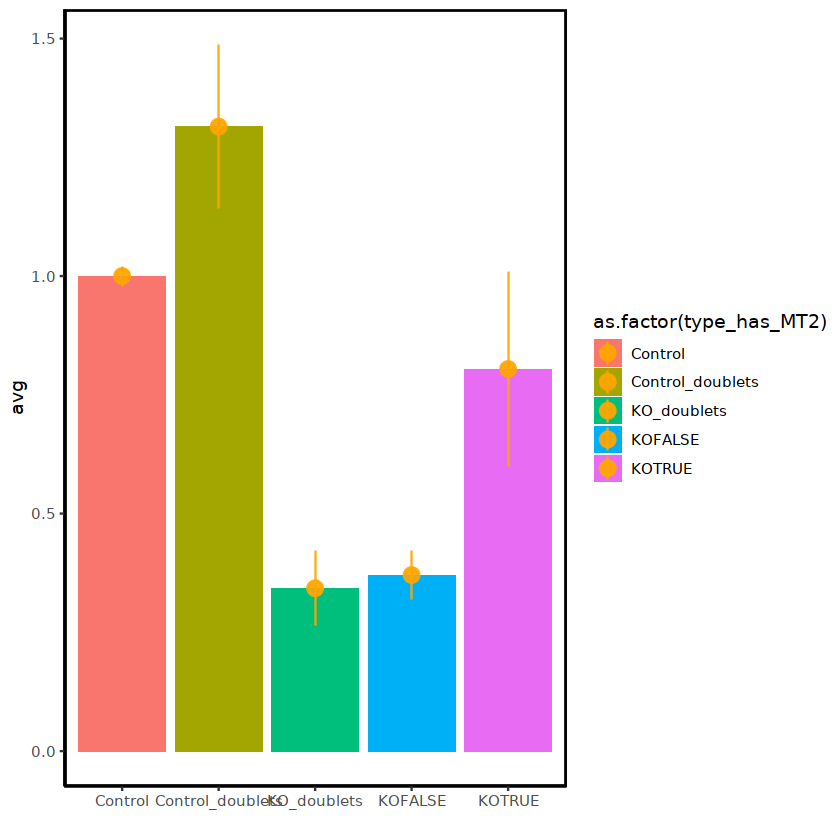

In [43]:
ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = avg, fill = as.factor(type_has_MT2))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


In [44]:
dim(all.exp2.doublets.df)
all.exp2.doublets.df_sample1 <- all.exp2.doublets.df

[1] 12729     6

# MT gRNA impact - Sample 2

[1] "MT mutation table"

   A    C D(1) D(2) D(3)    G I(1) I(3) I(5)    T 
 295  190   47    6    4  141   27    2    1  254 
[1] "MT mutation type"

  D   I   S 
 57  30 880 
[1] "MT mutation structure"

gRNA Rest   U6 
 688  182   97 


ERROR: Error in pdf(save_pdf, height = 10, width = 20): cannot open file './tmp/test.all.MT.pdf'


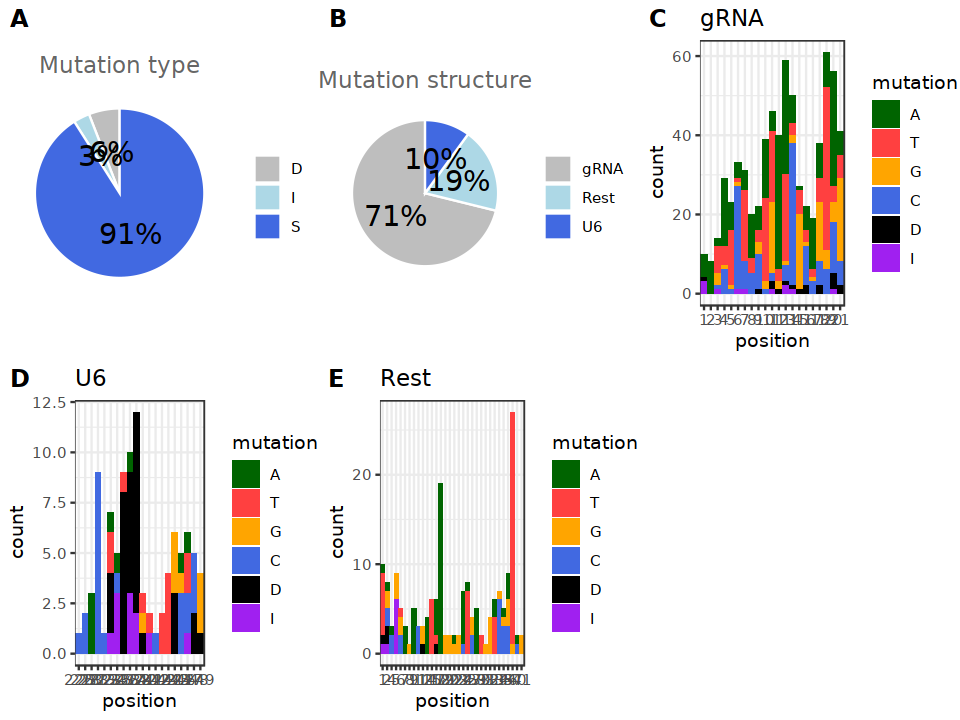

In [69]:
output_dir = './tmp/test'
input_dir = './GiRAFR_outputs/Tian_Neuron/sample2/'
fba_input_dir = '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Tian_Neuron/feature_barcoding_analysis/iPSC_lane2/'

MT <- plot_MT_pattern(input_dir, output_dir)


In [70]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA
    
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = max(feature_order))    
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = grepl('variant', MT)) %>% summarise(has_MT=any(is_MT))
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.



   1    2    3    4    5    6    7    8    9   10   11   12   13   16 
2584 2486 1906 1124  560  254  148   48   24   12    6    3    2    1 

[1] 9158

Rows: 12331 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


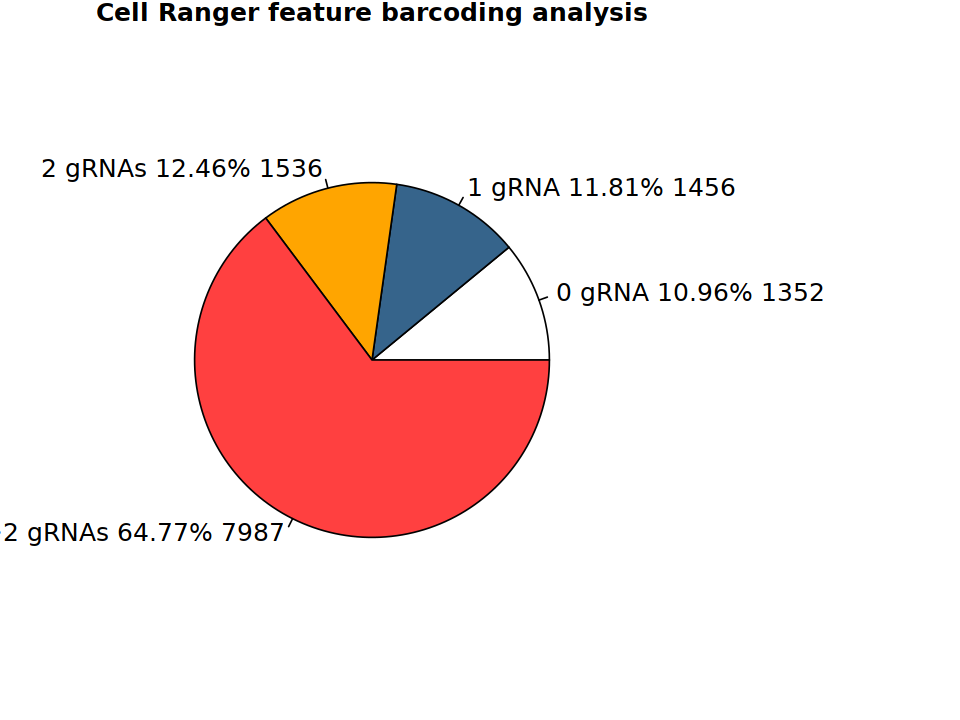

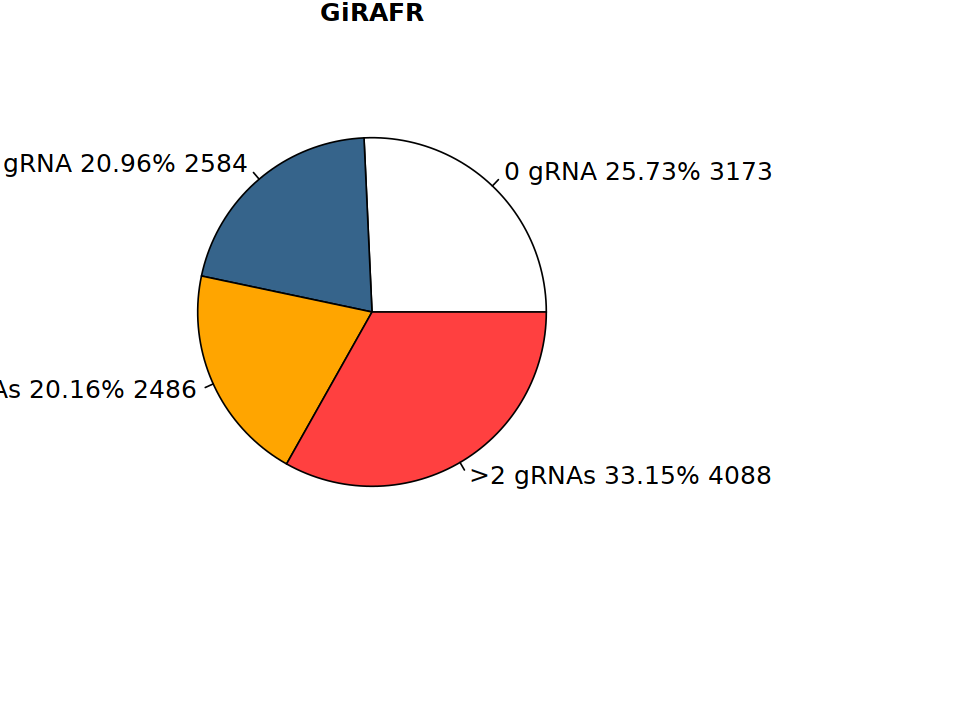

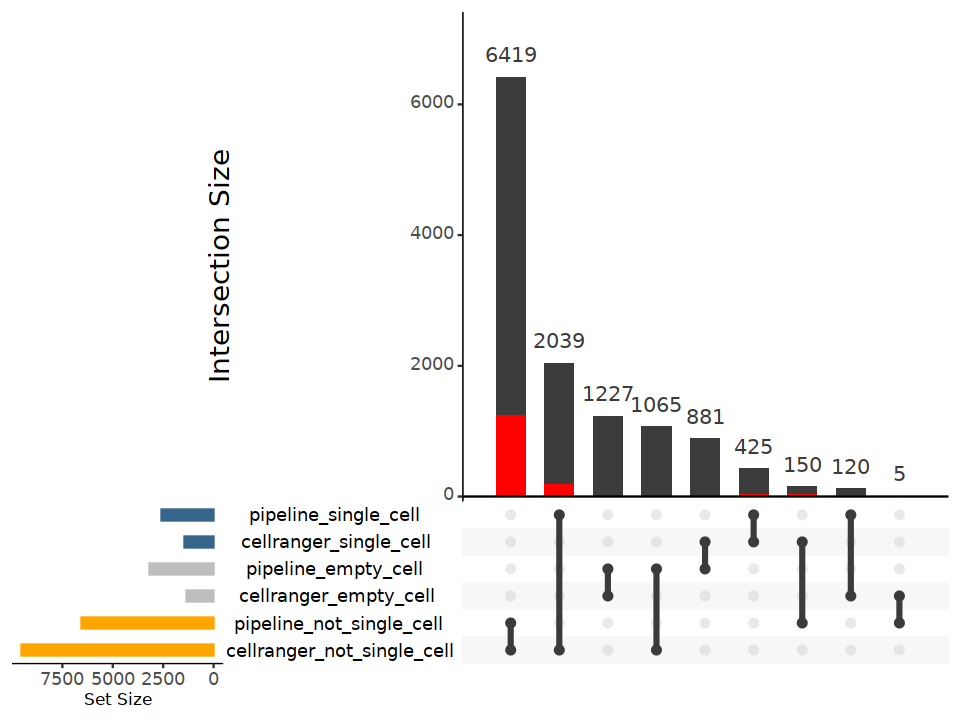

In [71]:
protospacer_file <- paste0(fba_input_dir, '/outs/crispr_analysis/protospacer_calls_per_cell.csv')
barcodes_file <- paste0(fba_input_dir, '/outs/filtered_feature_bc_matrix/barcodes.tsv.gz')

protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)


pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)


Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))

p

In [72]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  107    18 

In [73]:
table(all_barcodes$has_MT)


FALSE  TRUE 
 7657  1501 

### Analysis impact of mutant gRNA and doublets

In [74]:
input_dir

[1] "./GiRAFR_outputs/Tian_Neuron/sample2/"

In [75]:
cells.gRNA.single.MT <- read.table(paste0(input_dir, 'cells.gRNA.single.MT.txt'), stringsAsFactors = FALSE)
cells.gRNA.single.MT$target <- sapply(strsplit(cells.gRNA.single.MT$V3,"_"), `[`, 1)
cells.gRNA.single.MT[grepl('non-targeting',cells.gRNA.single.MT$target),]$target <- 'Control'
cells.gRNA.single.MT$is_WT <- !grepl(pattern = 'variant',cells.gRNA.single.MT$V3)
#table(cells.gRNA.single.MT$is_WT)
cells.gRNA.single.MT$cb = paste0(cells.gRNA.single.MT$V1, '-1')

In [76]:
diff_cb <- pipeline_Single[!pipeline_Single %in% cells.gRNA.single.MT$cb]

In [77]:
length(diff_cb)

[1] 0

pipeline_Single

In [78]:
all.matrix <- Read10X(paste0(fba_input_dir,'/outs/filtered_feature_bc_matrix/'))
expression.seurat.ori = CreateSeuratObject(counts = all.matrix$`Gene Expression`)
expression.seurat <- subset(expression.seurat.ori, cells = pipeline_Single)

expression.seurat <- NormalizeData(object = expression.seurat, normalization.method = "LogNormalize", scale.factor = 10000)
rownames(cells.gRNA.single.MT) <- cells.gRNA.single.MT$cb
expression.seurat@meta.data$KO <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'target']
expression.seurat@meta.data$is_WT <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'is_WT']
expression.seurat@meta.data$mutation <- cells.gRNA.single.MT[rownames(expression.seurat@meta.data),'V5']
expression.seurat@meta.data$cb <- rownames(expression.seurat@meta.data)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [79]:
sum(is.na(expression.seurat@meta.data$KO)) 
# should be same as length(diff_cb) 

[1] 0

In [80]:
rownames(cells.has_MT) <- cells.has_MT$cb
expression.seurat@meta.data$has_MT <- cells.has_MT[rownames(expression.seurat@meta.data), ]$has_MT

Warning message:
“Setting row names on a tibble is deprecated.”


In [81]:
diff_cb_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% diff_cb),]
rownames(diff_cb_gRNA) <- diff_cb_gRNA$cb

In [82]:
# replace KO NA into target
expression.seurat@meta.data$KO[which(expression.seurat@meta.data$cb %in% diff_cb)] <- 
sapply(strsplit(diff_cb_gRNA[rownames(expression.seurat@meta.data[which(expression.seurat@meta.data$cb %in% diff_cb),]), 'target'], '_'), `[`, 1)

In [83]:
table(expression.seurat@meta.data$is_WT, expression.seurat@meta.data$has_MT)
# has some discrepancy 

       
        FALSE TRUE
  FALSE     0  234
  TRUE   2350    0

In [84]:
#expression.seurat@meta.data[which(expression.seurat@meta.data$is_WT == FALSE & expression.seurat@meta.data$has_MT == FALSE),]

In [85]:
unique(expression.seurat$KO)

[1] "PPP2R1A"  "DUSP8"    "FECH"     "PMVK"     "KIF1A"    "UQCRQ"   
 [7] "RFK"      "HMGCS1"   "MAPK8"    "RAB7A"    "MAT2A"    "SQLE"    
[13] "UBA1"     "PPP1R8"   "GSR"      "PGGT1B"   "MVK"      "UROD"    
[19] "MMAB"     "HACD2"    "Control"  "GUK1"     "PPCDC"    "SEPSECS" 
[25] "TARS2"    "LSS"      "MAP3K12"  "ATP5A1"   "ASNA1"    "NDUFA1"  
[31] "NTRK1"    "TUFM"     "ATP5B"    "PPP1CB"   "ATP6V1B2"

In [86]:
expression.seurat$KO[expression.seurat$KO == 'ATP5A1'] <- 'ATP5F1A'
expression.seurat$KO[expression.seurat$KO == 'ATP5B'] <- 'ATP5F1B'

In [87]:
targets <- unique(expression.seurat@meta.data$KO)
targets <- targets[targets!='Control']
all.exp2.df <- data.frame()
CTRL_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == 'Control'),])
for(gene in targets){
        KO_cells <- row.names(expression.seurat@meta.data[which(expression.seurat@meta.data$KO == gene),])
        tmp.df <- rbind(data.frame(expression = expression.seurat@assays$RNA@data[gene, KO_cells], type = 'KO'),
            data.frame(expression = expression.seurat@assays$RNA@data[gene, CTRL_cells], type = 'Control'))

        tmp.df$target = gene
        #tmp.df$cb = rownames(tmp.df)
        tmp.df$cb = c(KO_cells, CTRL_cells)
        all.exp2.df <- rbind(all.exp2.df, tmp.df)
}

Target gene expression in Control

In [88]:
avg.exp.control <- all.exp2.df[which(all.exp2.df$type == 'Control'),] %>% group_by(target) %>% summarise(avg = mean(expression))
avg.exp.control <- as.data.frame(avg.exp.control)
rownames(avg.exp.control) <- avg.exp.control$target

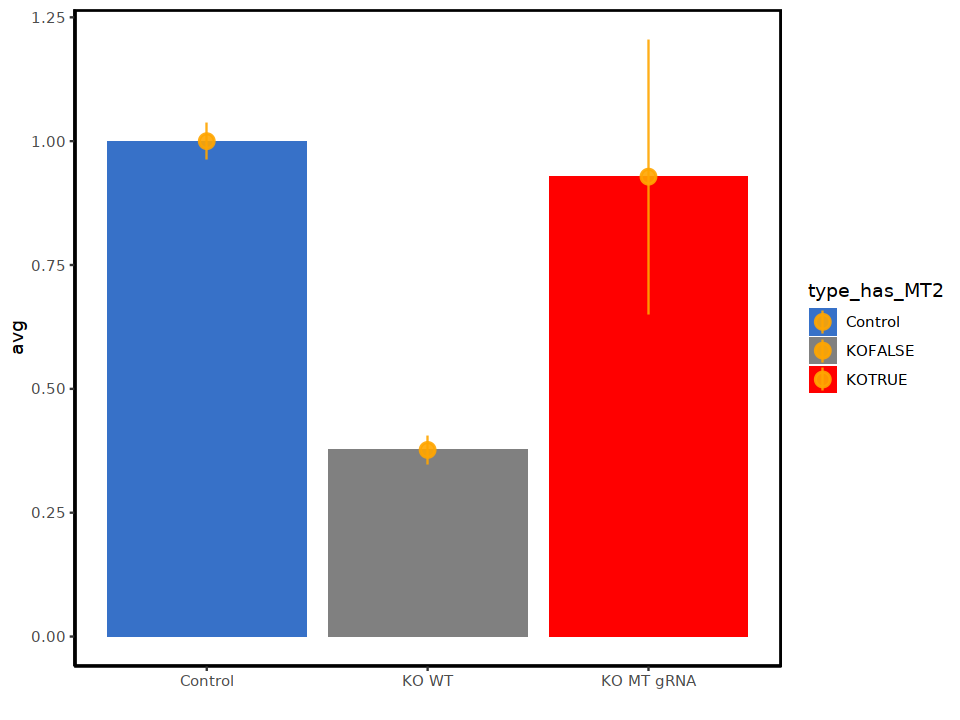

In [89]:
#all.exp2.MT.df <- merge(all.exp2.df, cells.gRNA.single.MT[,c(4,5,8,9)], by = 'cb')
all.exp2.MT.df <- merge(all.exp2.df, expression.seurat@meta.data[,c(4,6,7,8)], by = 'cb')
all.exp2.MT.df$type_has_MT <- paste0(all.exp2.MT.df$type, all.exp2.MT.df$has_MT)

all.exp2.MT.df$type_has_MT2 <- all.exp2.MT.df$type_has_MT
all.exp2.MT.df[which(all.exp2.MT.df$type_has_MT == 'ControlFALSE' |
    all.exp2.MT.df$type_has_MT == 'ControlNA' |
    all.exp2.MT.df$type_has_MT == 'ControlTRUE'),'type_has_MT2'] <- 'Control'


out_target <- avg.exp.control[which(avg.exp.control$avg == 0), 'target']
all.exp2.MT.df <- all.exp2.MT.df[which(!all.exp2.MT.df$target %in% out_target), ]

all.exp2.MT.df$expression_norm <- all.exp2.MT.df$expression/avg.exp.control[all.exp2.MT.df$target,'avg']

# high_exp_targets <- avg.exp.control$target[order(avg.exp.control$avg, decreasing = T)]
# tmp.df <- all.exp2.MT.df[which(all.exp2.MT.df$target %in% high_exp_targets), c('tmp','expression_norm')]

tmp.df <- all.exp2.MT.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm),
                                                 sem = sd(expression_norm)/sqrt(n))

p1 <- ggplot(tmp.df, aes(x = type_has_MT2, y = avg, fill = type_has_MT2)) + geom_col()+
        geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
        theme_classic()+
        xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))+
        scale_fill_manual(breaks = c("Control", "KOFALSE","KOTRUE"),
                          values=c("#3771c8", "#808080",'#ff0000'))+
        scale_x_discrete(limits = c("Control", "KOFALSE", "KOTRUE"), labels=c("Control" = "Control", "KOFALSE" = "KO WT", "KOTRUE" = "KO MT gRNA"))

print(p1)

### Analysis impact of doublets/multiplets

In [90]:
new_doublets <- all_barcodes[which(all_barcodes$pipeline_not_single_cell == 1 & all_barcodes$cellranger_single_cell == 1), 'X1']
length(new_doublets) 
# pipeline identified doubets, cellranger as single

[1] 150

For new doublets, following scenarios:
1. doublets with the mutant gRNA and wildtype gRNA targeting the same gene, 
2. doublets with the mutant gRNA and wildtype gRNA targeting the different gene
3. doublets with two wildtype gRNA targeting the same gene
4. doublets with two wildtype gRNA targeting different gene
5. doublets with two mutant gRNAs targeting different gene

In [91]:
new_doublets_gRNA <- cells.gRNA[which(cells.gRNA$cb %in% new_doublets),] # the mutant gRNA and wildtype gRNA targeting the same gene,


In [92]:
#new_doublets_type1 <- new_doublets_gRNA[which(new_doublets_gRNA$feature_order >= 2),]
#new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA[which(new_doublets_gRNA$feature_order < 2),] %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [93]:
new_doublets_gRNA2 <- as.data.frame(new_doublets_gRNA %>% group_by(cb) %>% summarise(target = list(target), UMIs = list(num_UMI_WT)))

In [94]:
new_doublets_gRNA2$KO <- lapply(new_doublets_gRNA2$target, function(x) sapply(strsplit(x, '_'), `[`, 1))
                                

In [95]:
if1 <- lapply(new_doublets_gRNA2$KO, function(x) x[1]== x[2])
if2 <- lapply(new_doublets_gRNA2$UMIs, function(x) x[1]>0 & x[2] > 0)
              
new_doublets_type_unknown <- c()
new_doublets_type2 <- c()
new_doublets_type3 <- c()
new_doublets_type4 <- c()
new_doublets_type5 <- c()
for(i in 1:nrow(new_doublets_gRNA2)){
    if(is.na(if1[i]) | is.na(if2[i])){
        new_doublets_type_unknown <- rbind(new_doublets_type_unknown, new_doublets_gRNA2[i,])
    }else{
    if(if1[i] == TRUE & if2[i] == TRUE){ # two wiltype gRNA targeting the same target
        new_doublets_type3 <- rbind(new_doublets_type3, new_doublets_gRNA2[i,])
    }else if(if1[i] == TRUE & if2[i] == FALSE){ #  mutant gRNA and wildtype gRNA or two muatnt targeting the same gene
        new_doublets_type2 <- rbind(new_doublets_type2, new_doublets_gRNA2[i,])
    }else if(if1[i] == FALSE & if2[i] == TRUE){# two wildtype gRNA targeting different gene
        new_doublets_type4 <- rbind(new_doublets_type4, new_doublets_gRNA2[i,]) 
    }else if(if1[i] == FALSE & if2[i] == FALSE){ # mutant gRNA and wildtype gRNA or two muatnt  different gene 
        new_doublets_type5 <- rbind(new_doublets_type5, new_doublets_gRNA2[i,])
    }else{
        print('unknown error')
    }
    }
}

In [96]:
#nrow(new_doublets_type1)
nrow(new_doublets_type2)
nrow(new_doublets_type3)
nrow(new_doublets_type4)
nrow(new_doublets_type5)
nrow(new_doublets_type_unknown)

NULL

[1] 5

[1] 118

[1] 26

[1] 1

In [97]:
new_doublets_subset <- rbind(new_doublets_type4, new_doublets_type5)$cb
length(new_doublets_subset)

[1] 144

In [98]:
seurat.object.doublets <- subset(expression.seurat.ori, cells = new_doublets_subset)
seurat.object.doublets <- NormalizeData(object = seurat.object.doublets, normalization.method = "LogNormalize", scale.factor = 10000)
seurat.object.doublets

An object of class Seurat 
33538 features across 144 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data

In [99]:
head(rbind(new_doublets_type4, new_doublets_type5))
table(cells.num_features[which(cells.num_features$cb %in% new_doublets_subset),'num_features'])

,cb,target,UMIs,KO
,<chr>,<list>,<list>,<list>
1,AACCGCGAGAGTGAGA-1,"RAB7A_sgRNA2_gene , MAP3K12_sgRNA2_gene","1, 1","RAB7A , MAP3K12"
2,AACCGCGGTTCGTGAT-1,"SEPSECS_sgRNA1_gene, PPP2R1A_sgRNA2_gene","13, 4","SEPSECS, PPP2R1A"
3,AAGCCGCCACACATGT-1,"SQLE_sgRNA2_gene , PPP2R1A_sgRNA2_gene","3, 3","SQLE , PPP2R1A"
5,AAGGCAGGTAAGTGTA-1,"MAT2A_sgRNA2_gene , PPP2R1A_sgRNA2_gene","10, 6","MAT2A , PPP2R1A"
7,AAGTCTGCAACTGGCC-1,"RFK_sgRNA1_gene , PPP2R1A_sgRNA2_gene","17, 10","RFK , PPP2R1A"
8,AATCCAGAGGCCCGTT-1,"SEPSECS_sgRNA1_gene, PPP2R1A_sgRNA2_gene","24, 5","SEPSECS, PPP2R1A"


num_features
  2   3   4 
117  20   7 

In [100]:
protospacer.df <- read.csv(protospacer_file)
rownames(protospacer.df) <- protospacer.df$cell_barcode

In [101]:
seurat.object.doublets@meta.data <- cbind(seurat.object.doublets@meta.data, protospacer.df[colnames(seurat.object.doublets),])
seurat.object.doublets$KO <- sapply(strsplit(seurat.object.doublets@meta.data$feature_call, '_'), `[`, 1)

In [102]:
seurat.object.doublets$KO[seurat.object.doublets$KO == 'non-targeting'] <- 'Control'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5A1'] <- 'ATP5F1A'
seurat.object.doublets$KO[seurat.object.doublets$KO == 'ATP5B'] <- 'ATP5F1B'

In [103]:
doublets_targets <- unique(seurat.object.doublets$KO)[-which(unique(seurat.object.doublets$KO) == 'Control')] # remove 'neg'
doublets.exp.df <- data.frame()
CTRL_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == 'Control'),])

for(gene in doublets_targets){
    KO_cells <- row.names(seurat.object.doublets@meta.data[which(seurat.object.doublets@meta.data$KO == gene),])
   tmp.df <- rbind(data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, KO_cells], type = 'KO_doublets'),
                    data.frame(expression = seurat.object.doublets@assays$RNA@data[gene, CTRL_cells], type = 'Control_doublets'))
   tmp.df$target = gene
   tmp.df$cb = c(KO_cells, CTRL_cells)
   doublets.exp.df <- rbind(doublets.exp.df, tmp.df)
}

In [104]:
doublets.exp.df$type_has_MT2 <- doublets.exp.df$type

In [105]:
doublets.exp.df$expression_norm <- doublets.exp.df$expression/avg.exp.control[doublets.exp.df$target,'avg']

In [106]:
all.exp2.doublets.df <- rbind(doublets.exp.df, all.exp2.MT.df[, c('expression', 'type', 'target', 'cb', 'type_has_MT2', 'expression_norm')])

In [107]:
table(all.exp2.doublets.df$type_has_MT)


         Control Control_doublets      KO_doublets          KOFALSE 
            3828              240              134             2236 
          KOTRUE 
             231 

In [108]:
tmp.df <- all.exp2.doublets.df
tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
tmp.df

type_has_MT2,n,avg,sd,sem
<chr>,<int>,<dbl>,<dbl>,<dbl>
Control,3828,1.0000000,2.284191,0.03691871
Control_doublets,240,1.6407875,7.972720,0.51463689
KOFALSE,2236,0.3767182,1.345491,0.02845411
KOTRUE,231,0.9283445,4.223615,0.27789348
KO_doublets,134,0.8466845,4.527166,0.39108753


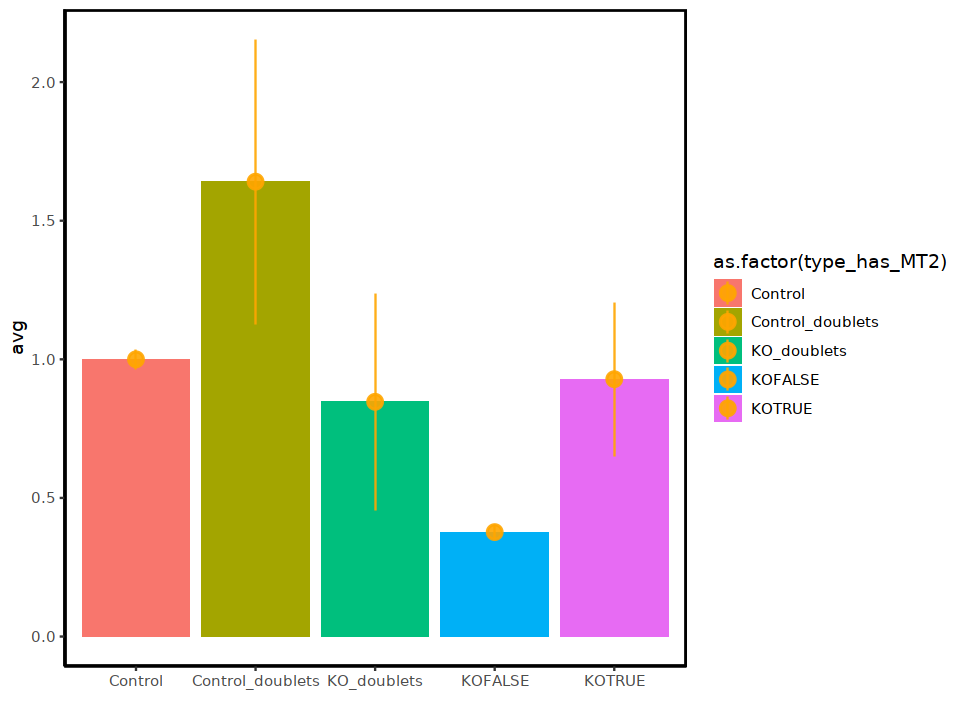

In [109]:
ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = avg, fill = as.factor(type_has_MT2))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))


In [110]:
dim(all.exp2.doublets.df)
all.exp2.doublets.df_sample2 <- all.exp2.doublets.df

[1] 6669    6

## Combine two samples

In [111]:
dim(all.exp2.doublets.df_sample1)
dim(all.exp2.doublets.df_sample2)

[1] 12729     6

[1] 6669    6

In [112]:
all.exp2.doublets.df_combine <- rbind(all.exp2.doublets.df_sample1, all.exp2.doublets.df_sample2)

type_has_MT2,n,avg,sd,sem
<chr>,<int>,<dbl>,<dbl>,<dbl>
Control,12540,1.0000000,2.066026,0.0184496
Control_doublets,411,1.5050901,6.260945,0.3088297
KOFALSE,5706,0.3729626,2.508597,0.0332097
KOTRUE,536,0.8577201,3.863540,0.1668795
KO_doublets,205,0.6721635,3.683764,0.2572852


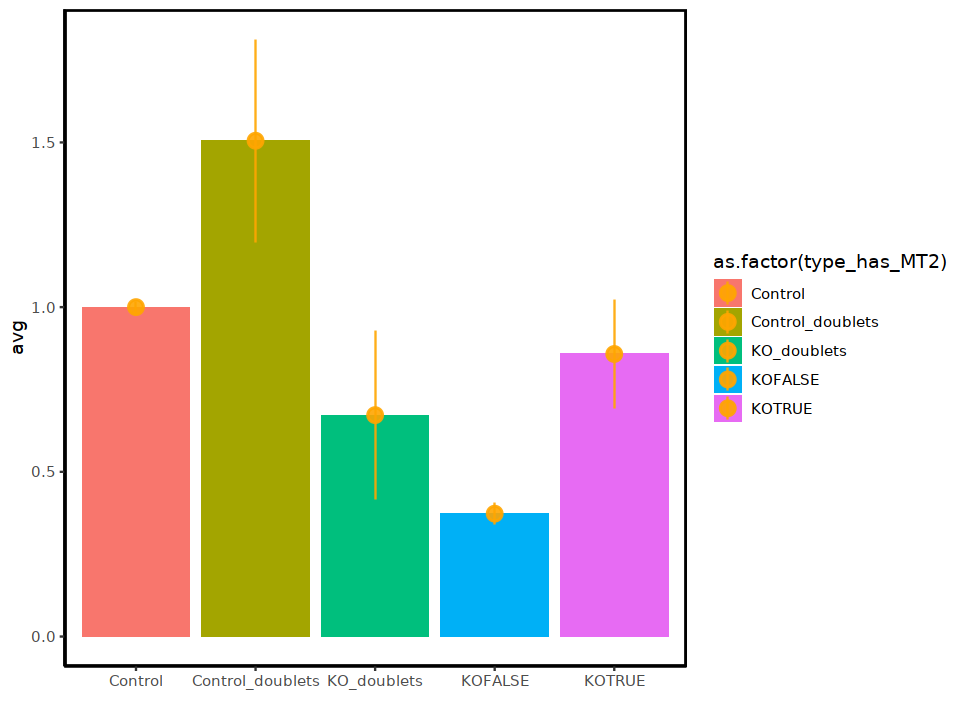

In [113]:
#pdf('Tian_Neuron_gRNA_target_exp.pdf')
tmp.df <- all.exp2.doublets.df_combine
tmp.df <- tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
tmp.df

ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = avg, fill = as.factor(type_has_MT2))) + 
geom_col()+
#geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), width=.2,position=position_dodge(.9)) +
#geom_pointrange(aes(x=nr_mutation, y=avg, ymin=avg-sd, ymax=avg+sd), colour="orange", alpha=0.9, size=1.3)+
geom_pointrange(aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem), colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1))
#dev.off()

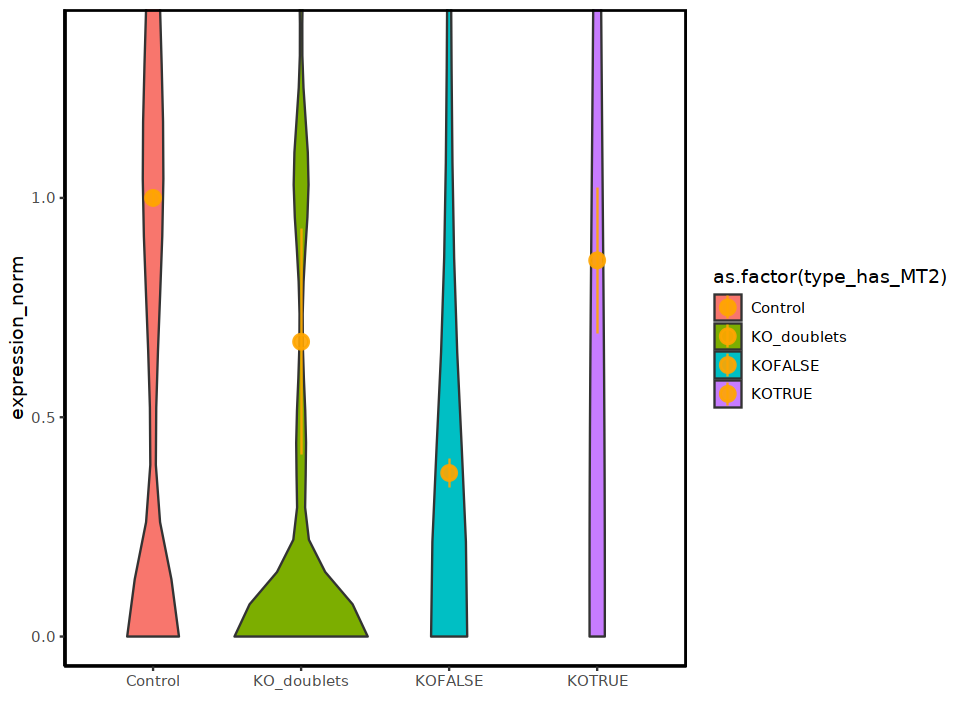

In [114]:
options(repr.plot.width = 8, repr.plot.height = 6)
#pdf('Tian_Neuron_gRNA_target_exp_violin.pdf')
tmp.df <- all.exp2.doublets.df_combine
tmp.df <- tmp.df[which(tmp.df$type_has_MT2 != 'Control_doublets'),]
tmp <-  tmp.df %>% group_by(type_has_MT2) %>% summarise(n = n(), avg = mean(expression_norm), 
                                                 sd = sd(expression_norm), sem = sd(expression_norm)/sqrt(n))
ylims <- tmp.df %>%
  group_by(type_has_MT2) %>%
  summarise(Q1 = quantile(expression_norm, 1/4), Q3 = quantile(expression_norm, 3/4)) %>%
  ungroup() %>%
  #get lowest Q1 and highest Q3
  summarise(lowQ1 = min(Q1), highQ3 = max(Q3))

ggplot(tmp.df, 
       aes(
           x = type_has_MT2, 
           y = expression_norm, fill = as.factor(type_has_MT2))) + 
geom_violin()+
coord_cartesian(ylim = as.numeric(ylims)*1)+ # zoom in
geom_pointrange(data = tmp, aes(x=type_has_MT2, y=avg, ymin=avg-sem, ymax=avg+sem),
                colour="orange", alpha=0.9, size=0.8)+
theme_classic()+
xlab('')+theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1))
#dev.off()